In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.cm as cm 

# Load all datasets from both customers and gateway
all_datasets = {}

# Load customers unified data
customers_root = Path("customers/unified")
for csv_file in customers_root.rglob("all_metrics_combined*.csv"):
    experiment_name = csv_file.parent.name 
    df = pd.read_csv(csv_file)
    df["source"] = experiment_name.upper()
    df["service"] = "customers"
    all_datasets[f"customers_{experiment_name}"] = df
    print(f"Loaded customers {experiment_name} experiment ({len(df)} rows)")

# Load customers jvm unified data  
customers_jvm_root = Path("customers jvm/unified")
for csv_file in customers_jvm_root.rglob("all_metrics_combined*.csv"):
    experiment_name = csv_file.parent.name 
    df = pd.read_csv(csv_file)
    df["source"] = experiment_name.upper()
    df["service"] = "customers"
    all_datasets[f"customers_{experiment_name}"] = df
    print(f"Loaded customers jvm {experiment_name} experiment ({len(df)} rows)")

# Load gateway unified data  
gateway_root = Path("gateway/unified")
for csv_file in gateway_root.rglob("all_metrics_combined*.csv"):
    experiment_name = csv_file.parent.name 
    df = pd.read_csv(csv_file)
    df["source"] = experiment_name.upper()
    df["service"] = "gateway"
    all_datasets[f"gateway_{experiment_name}"] = df
    print(f"Loaded gateway {experiment_name} experiment ({len(df)} rows)")

# Load gateway jvm unified data  
gateway_jvm_root = Path("gateway jvm/unified")
for csv_file in gateway_jvm_root.rglob("all_metrics_combined*.csv"):
    experiment_name = csv_file.parent.name 
    df = pd.read_csv(csv_file)
    df["source"] = experiment_name.upper()
    df["service"] = "gateway"
    all_datasets[f"gateway_{experiment_name}"] = df
    print(f"Loaded gateway jvm {experiment_name} experiment ({len(df)} rows)")

df_all = pd.concat(all_datasets.values(), ignore_index=True)

print(f"\nTotal datasets loaded: {len(all_datasets)}")
print(f"Available datasets: {list(all_datasets.keys())}")
print(f"Combined dataframe: {len(df_all)} rows")


2025-07-25 14:12:07.062674: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-25 14:12:07.071516: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-25 14:12:07.150561: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-25 14:12:07.214030: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753445527.266677   11411 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753445527.28

Loaded customers net_loss experiment (485 rows)
Loaded customers IOpressure experiment (481 rows)
Loaded customers mem_stress experiment (484 rows)
Loaded customers baseline experiment (492 rows)
Loaded customers cpu_stress experiment (484 rows)
Loaded customers jvm cache_filling experiment (480 rows)
Loaded customers jvm oom experiment (481 rows)
Loaded customers jvm threadfull experiment (481 rows)
Loaded customers jvm gc_stress experiment (481 rows)
Loaded customers jvm baseline experiment (486 rows)
Loaded gateway delay experiment (491 rows)
Loaded gateway cpu stress experiment (484 rows)
Loaded gateway mem stress experiment (499 rows)
Loaded gateway netloss experiment (489 rows)
Loaded gateway baseline experiment (492 rows)
Loaded gateway jvm cache_filling experiment (481 rows)
Loaded gateway jvm oom experiment (481 rows)
Loaded gateway jvm threadfull experiment (478 rows)
Loaded gateway jvm gc_stress experiment (479 rows)
Loaded gateway jvm baseline experiment (486 rows)

Total d

🚀 Avvio analisi completa delle feature...
🔍 ANALISI DELLE FEATURE DEI DATASET
📊 STATISTICHE GENERALI:
   Total dataset: 18
   Feature uniche totali: 169
   Tutti i dataset hanno le stesse feature: ❌ NO

📋 DETTAGLI PER DATASET:
--------------------------------------------------------------------------------
customers_net_loss:
   Shape: (485, 82)
   Feature count: 82
   Features: ['minutes', 'cpu_cpu_iowait_cpu 0', 'cpu_cpu_iowait_cpu 1', 'cpu_cpu_iowait_cpu 2', 'cpu_cpu_iowait_cpu 3']...

customers_IOpressure:
   Shape: (481, 72)
   Feature count: 72
   Features: ['minutes', 'cpu_cpu_iowait_cpu 0', 'cpu_cpu_iowait_cpu 1', 'cpu_cpu_iowait_cpu 2', 'cpu_cpu_iowait_cpu 3']...

customers_mem_stress:
   Shape: (484, 82)
   Feature count: 82
   Features: ['minutes', 'cpu_cpu_iowait_cpu 0', 'cpu_cpu_iowait_cpu 1', 'cpu_cpu_iowait_cpu 2', 'cpu_cpu_iowait_cpu 3']...

customers_baseline:
   Shape: (486, 73)
   Feature count: 73
   Features: ['minutes', 'cpu_iowait_cpu 0', 'cpu_iowait_cpu 1', 'cpu

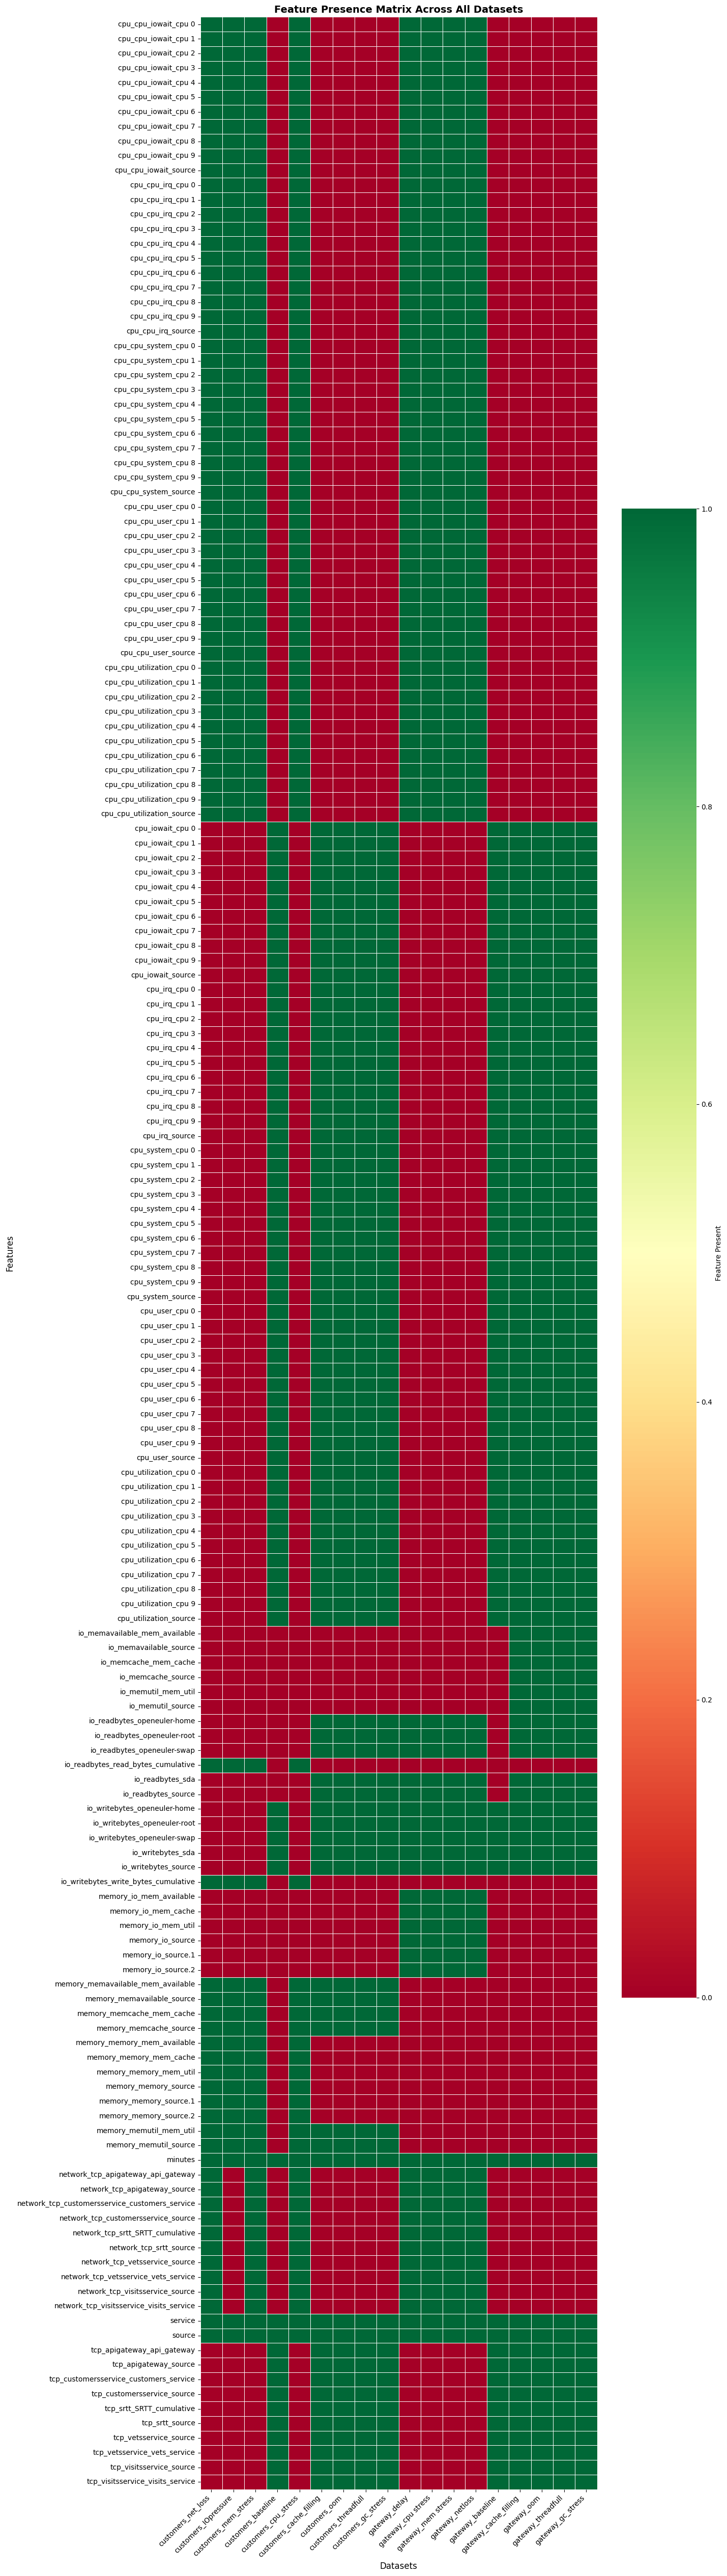


🎯 ANALISI FEATURE COMUNI E UNICHE:
📊 Feature comuni a TUTTI i dataset (3):
    1. minutes
    2. service
    3. source

📊 Totale feature uniche across tutti dataset: 169

✅ Nessuna feature unica - tutti i dataset hanno le stesse feature!

📊 STATISTICHE DETTAGLIATE FEATURE:

📈 Feature presenti in 18/18 dataset (100.0%):
    1. minutes
    2. service
    3. source

📈 Feature presenti in 14/18 dataset (77.8%):
    1. io_writebytes_openeuler-home
    2. io_writebytes_openeuler-root
    3. io_writebytes_openeuler-swap
    4. io_writebytes_sda
    5. io_writebytes_source

📈 Feature presenti in 12/18 dataset (66.7%):
    1. io_readbytes_openeuler-home
    2. io_readbytes_openeuler-root
    3. io_readbytes_openeuler-swap
    4. io_readbytes_sda
    5. io_readbytes_source

📈 Feature presenti in 10/18 dataset (55.6%):
    1. cpu_iowait_cpu 0
    2. cpu_iowait_cpu 1
    3. cpu_iowait_cpu 2
    4. cpu_iowait_cpu 3
    5. cpu_iowait_cpu 4
    6. cpu_iowait_cpu 5
    7. cpu_iowait_cpu 6
    8. cpu_

In [2]:
def analyze_dataset_features(all_datasets):
    """
    Analizza e confronta le feature di tutti i dataset per vedere se sono identiche
    """
    
    print("🔍 ANALISI DELLE FEATURE DEI DATASET")
    print("=" * 80)
    
    # Dizionario per memorizzare le feature di ogni dataset
    dataset_features = {}
    
    # Estrai le feature per ogni dataset
    for dataset_name, df in all_datasets.items():
        features = list(df.columns)
        dataset_features[dataset_name] = {
            'features': features,
            'count': len(features),
            'shape': df.shape
        }
    
    # Trova tutte le feature uniche across tutti i dataset
    all_features = set()
    for info in dataset_features.values():
        all_features.update(info['features'])
    
    all_features = sorted(list(all_features))
    
    print(f"📊 STATISTICHE GENERALI:")
    print(f"   Total dataset: {len(all_datasets)}")
    print(f"   Feature uniche totali: {len(all_features)}")
    
    # Controlla se tutti i dataset hanno le stesse feature
    feature_sets = [set(info['features']) for info in dataset_features.values()]
    all_same = all(fs == feature_sets[0] for fs in feature_sets)
    
    print(f"   Tutti i dataset hanno le stesse feature: {'✅ SÌ' if all_same else '❌ NO'}")
    
    print(f"\n📋 DETTAGLI PER DATASET:")
    print("-" * 80)
    
    for dataset_name, info in dataset_features.items():
        print(f"{dataset_name}:")
        print(f"   Shape: {info['shape']}")
        print(f"   Feature count: {info['count']}")
        print(f"   Features: {info['features'][:5]}{'...' if len(info['features']) > 5 else ''}")
        print()
    
    # Se non sono tutte uguali, mostra le differenze
    if not all_same:
        print("\n⚠️  DIFFERENZE TRA DATASET:")
        print("-" * 80)
        
        # Trova il dataset con più feature come riferimento
        reference_dataset = max(dataset_features.keys(), 
                              key=lambda x: dataset_features[x]['count'])
        reference_features = set(dataset_features[reference_dataset]['features'])
        
        print(f"Dataset di riferimento (più feature): {reference_dataset}")
        print(f"Feature di riferimento: {len(reference_features)}")
        
        for dataset_name, info in dataset_features.items():
            if dataset_name == reference_dataset:
                continue
                
            current_features = set(info['features'])
            
            # Feature mancanti nel dataset corrente
            missing = reference_features - current_features
            # Feature extra nel dataset corrente
            extra = current_features - reference_features
            
            if missing or extra:
                print(f"\n{dataset_name}:")
                if missing:
                    print(f"   Mancanti: {sorted(list(missing))}")
                if extra:
                    print(f"   Extra: {sorted(list(extra))}")
    
    return dataset_features, all_features

def create_feature_comparison_matrix(all_datasets):
    """
    Crea una matrice di confronto delle feature tra tutti i dataset
    """
    
    dataset_names = list(all_datasets.keys())
    all_features = set()
    
    # Raccogli tutte le feature
    for df in all_datasets.values():
        all_features.update(df.columns)
    
    all_features = sorted(list(all_features))
    
    # Crea matrice presenza feature
    feature_matrix = pd.DataFrame(
        index=all_features,
        columns=dataset_names,
        dtype=bool
    )
    
    # Riempi la matrice
    for dataset_name, df in all_datasets.items():
        for feature in all_features:
            feature_matrix.loc[feature, dataset_name] = feature in df.columns
    
    # Visualizza la matrice
    plt.figure(figsize=(max(12, len(dataset_names) * 0.8), max(8, len(all_features) * 0.3)))
    
    # Converti bool a int per colormap
    matrix_numeric = feature_matrix.astype(int)
    
    sns.heatmap(
        matrix_numeric,
        cmap='RdYlGn',
        cbar_kws={'label': 'Feature Present'},
        xticklabels=True,
        yticklabels=True,
        linewidths=0.5
    )
    
    plt.title('Feature Presence Matrix Across All Datasets', fontsize=14, fontweight='bold')
    plt.xlabel('Datasets', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return feature_matrix

def get_common_and_unique_features(all_datasets):
    """
    Identifica feature comuni e uniche tra i dataset
    """
    
    dataset_features = {}
    for name, df in all_datasets.items():
        dataset_features[name] = set(df.columns)
    
    # Feature presenti in TUTTI i dataset
    common_features = set.intersection(*dataset_features.values())
    
    # Feature presenti in almeno un dataset
    all_features = set.union(*dataset_features.values())
    
    # Feature uniche per ogni dataset
    unique_features = {}
    for name, features in dataset_features.items():
        unique_to_this = features - set.union(*(f for n, f in dataset_features.items() if n != name))
        if unique_to_this:
            unique_features[name] = unique_to_this
    
    print("\n🎯 ANALISI FEATURE COMUNI E UNICHE:")
    print("=" * 80)
    
    print(f"📊 Feature comuni a TUTTI i dataset ({len(common_features)}):")
    if common_features:
        for i, feature in enumerate(sorted(common_features), 1):
            print(f"   {i:2d}. {feature}")
    else:
        print("   Nessuna feature comune a tutti i dataset!")
    
    print(f"\n📊 Totale feature uniche across tutti dataset: {len(all_features)}")
    
    if unique_features:
        print(f"\n📊 Feature uniche per dataset:")
        for dataset_name, features in unique_features.items():
            print(f"   {dataset_name}: {sorted(list(features))}")
    else:
        print(f"\n✅ Nessuna feature unica - tutti i dataset hanno le stesse feature!")
    
    return common_features, unique_features

def show_feature_statistics(all_datasets):
    """
    Mostra statistiche dettagliate delle feature
    """
    
    print("\n📊 STATISTICHE DETTAGLIATE FEATURE:")
    print("=" * 80)
    
    # Conta occorrenze di ogni feature
    feature_counts = {}
    total_datasets = len(all_datasets)
    
    for dataset_name, df in all_datasets.items():
        for feature in df.columns:
            if feature not in feature_counts:
                feature_counts[feature] = 0
            feature_counts[feature] += 1
    
    # Raggruppa per frequenza
    by_frequency = {}
    for feature, count in feature_counts.items():
        if count not in by_frequency:
            by_frequency[count] = []
        by_frequency[count].append(feature)
    
    for frequency in sorted(by_frequency.keys(), reverse=True):
        features = sorted(by_frequency[frequency])
        percentage = (frequency / total_datasets) * 100
        
        print(f"\n📈 Feature presenti in {frequency}/{total_datasets} dataset ({percentage:.1f}%):")
        for i, feature in enumerate(features, 1):
            print(f"   {i:2d}. {feature}")

# Esegui l'analisi completa
print("🚀 Avvio analisi completa delle feature...")

# Analisi principale
dataset_info, all_unique_features = analyze_dataset_features(all_datasets)

# Matrice di confronto visuale
print("\n📊 Creazione matrice di confronto visuale...")
feature_matrix = create_feature_comparison_matrix(all_datasets)

# Feature comuni e uniche
common_features, unique_features = get_common_and_unique_features(all_datasets)

# Statistiche dettagliate
show_feature_statistics(all_datasets)

# Summary finale
print("\n" + "="*80)
print("📋 SUMMARY FINALE:")
print("="*80)
print(f"✅ Dataset analizzati: {len(all_datasets)}")
print(f"✅ Feature totali uniche: {len(all_unique_features)}")
print(f"✅ Feature comuni a tutti: {len(common_features)}")
print(f"✅ Dataset con feature uniche: {len(unique_features)}")

if len(common_features) == len(all_unique_features):
    print("🎉 TUTTI I DATASET HANNO ESATTAMENTE LE STESSE FEATURE!")
else:
    print("⚠️  I dataset NON hanno tutte le stesse feature")
    print(f"   Differenza: {len(all_unique_features) - len(common_features)} feature non comuni")

# NaN visual

In [ ]:
def plot_simple_nan_histogram(df, title="NaN Count Histogram"):

    nan_counts = df.isnull().sum()
    
    has_nan = nan_counts[nan_counts > 0]
    
    if len(has_nan) == 0:
        print("Nessun valore NaN trovato nel dataset")
        return
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(has_nan)), has_nan.values, color='red', alpha=0.7)
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('NaN Count', fontsize=12)
    plt.xticks(range(len(has_nan)), has_nan.index, rotation=45, ha='right')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_nan_distribution_histogram(df, title="NaN Distribution per Row"):
    """
    Plotta la distribuzione del numero di NaN per riga
    """
    nan_per_row = df.isnull().sum(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.hist(nan_per_row, bins=30, color='purple', alpha=0.7, edgecolor='black')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Numero di NaN per riga', fontsize=12)
    plt.ylabel('Frequenza', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_nan_histogram_all_experiments(all_datasets):
    """
    Plotta l'istogramma dei NaN per tutti gli esperimenti
    """
    experiments = list(all_datasets.keys())
    n_experiments = len(experiments)
    
    # Calcola dimensioni griglia
    if n_experiments <= 4:
        rows, cols = 2, 2
        figsize = (16, 10)
    else:
        rows = int(np.ceil(n_experiments / 2))
        cols = 2
        figsize = (16, 5*rows)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Se c'è solo un subplot, converti in lista
    if n_experiments == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, exp_name in enumerate(experiments):
        if i < len(axes):
            ax = axes[i]
            df = all_datasets[exp_name]
            
            # Calcola NaN count
            nan_counts = df.isnull().sum()
            has_nan = nan_counts[nan_counts > 0]
            
            if len(has_nan) > 0:
                # Plot bar chart
                bars = ax.bar(range(len(has_nan)), has_nan.values, color='red', alpha=0.7)
                
                ax.set_title(f'NaN Count - {exp_name.upper()}', fontsize=14, fontweight='bold')
                ax.set_xlabel('Features', fontsize=10)
                ax.set_ylabel('NaN Count', fontsize=10)
                
                # Abbrevia i nomi delle features per leggibilità
                feature_names = []
                for name in has_nan.index:
                    if len(name) > 12:
                        # Prendi prime 12 caratteri
                        short_name = name[:12] + "..."
                    else:
                        short_name = name
                    feature_names.append(short_name)
                
                ax.set_xticks(range(len(has_nan)))
                ax.set_xticklabels(feature_names, rotation=45, ha='right', fontsize=8)
                
                ax.grid(True, alpha=0.3)
                
                # Aggiungi valori sopra le barre se sono poche
                if len(has_nan) <= 8:
                    for bar, value in zip(bars, has_nan.values):
                        ax.text(bar.get_x() + bar.get_width()/2, 
                               bar.get_height() + max(has_nan.values)*0.01,
                               f'{int(value)}', ha='center', va='bottom', fontsize=8)
                
                # Summary testuale nell'angolo
                total_nan = has_nan.sum()
                ax.text(0.02, 0.98, f'Total NaN: {total_nan}', transform=ax.transAxes, 
                       fontsize=10, verticalalignment='top', 
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
            else:
                # Nessun NaN trovato
                ax.text(0.5, 0.5, f'No NaN\nin {exp_name.upper()}', 
                       ha='center', va='center', transform=ax.transAxes, 
                       fontsize=16, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
                ax.set_title(f'NaN Count - {exp_name.upper()}', fontsize=14, fontweight='bold')
    
    # Nascondi subplot vuoti
    for j in range(len(experiments), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_nan_histogram_all_experiments(all_datasets)


## clean NaN and redundant features

In [5]:
def clean_source_columns(df, keep_col='source'):
    df = df.copy()
    source_cols = [col for col in df.columns if 'source' in col.lower()]
    
    if not source_cols:
        return df
    
    priority_cols = ['source', 'Source']
    primary_source_col = None
    
    for priority_col in priority_cols:
        if priority_col in df.columns:
            primary_source_col = priority_col
            break
    
    if primary_source_col is None:
        primary_source_col = source_cols[0]
    
    if primary_source_col != 'source':
        df = df.rename(columns={primary_source_col: 'source'})
    
    columns_to_drop = [col for col in source_cols if col != primary_source_col]
    if columns_to_drop:
        df = df.drop(columns=columns_to_drop)
    
    return df

def clean_minutes_columns(df, keep_col='minutes'):
    df = df.copy()
    minutes_cols = [col for col in df.columns if 'minutes' in col.lower()]
    
    if keep_col in minutes_cols:
        to_keep = keep_col
    elif minutes_cols:
        to_keep = minutes_cols[0]
    else:
        return df
    
    to_drop = [col for col in minutes_cols if col != to_keep]
    if to_drop:
        df = df.drop(columns=to_drop)
    
    return df

def round_float_columns(df, decimal_places=2):
    """Round all float columns to specified decimal places"""
    df = df.copy()
    
    # Get float columns
    float_cols = df.select_dtypes(include=['float64', 'float32']).columns
    
    # Round float columns
    for col in float_cols:
        df[col] = df[col].round(decimal_places)
    
    return df

def clean_dataset(df):
    df = df.copy()
    
    cpu_8_9_cols = []
    for col in df.columns:
        col_lower = col.lower()
        if any(pattern in col_lower for pattern in ['cpu_8', 'cpu_9']):
            cpu_8_9_cols.append(col)
    
    if cpu_8_9_cols:
        df = df.drop(columns=cpu_8_9_cols)
    
    tcp_cols = [col for col in df.columns if any(term in col.lower() for term in ['api', 'service', 'gateway', 'customer', 'vet', 'visit']) and 'srtt' not in col.lower()]
    for col in tcp_cols:
        df[col] = df[col].fillna(0)
    
    other_cols = [col for col in df.columns if col not in tcp_cols and df[col].isnull().sum() > 0]
    for col in other_cols:
        df[col] = df[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
    
    # Round all float columns to 2 decimal places
    df = round_float_columns(df, decimal_places=2)
    
    return df

def clean_all_datasets_comprehensive(all_datasets):
    processed = {}
    
    for name, df in all_datasets.items():
        original_shape = df.shape
        
        df_cleaned = clean_source_columns(df)
        df_cleaned = clean_minutes_columns(df_cleaned)
        df_cleaned = clean_dataset(df_cleaned)
        
        processed[name] = df_cleaned
    
    return processed

# Clean individual datasets
all_datasets = clean_all_datasets_comprehensive(all_datasets)

# Clean the combined dataframe
df_all_cleaned = clean_source_columns(df_all)
df_all_cleaned = clean_minutes_columns(df_all_cleaned)
df_all_cleaned = clean_dataset(df_all_cleaned)

df_all = df_all_cleaned

print(f"Cleaned datasets with 2-decimal rounding applied")
print(f"df_all shape: {df_all.shape}")

# Verify rounding was applied
float_cols = df_all.select_dtypes(include=['float64', 'float32']).columns
if len(float_cols) > 0:
    sample_col = float_cols[0]
    sample_values = df_all[sample_col].head()
    print(f"Sample float values from '{sample_col}': {sample_values.tolist()}")
    
    # Check decimal places
    max_decimals = 0
    for val in sample_values:
        if pd.notna(val):
            decimal_str = str(val)
            if '.' in decimal_str:
                decimals = len(decimal_str.split('.')[1])
                max_decimals = max(max_decimals, decimals)
    
    print(f"Maximum decimal places in sample: {max_decimals}")
else:
    print("No float columns found")

Cleaned datasets with 2-decimal rounding applied
df_all shape: (8723, 194)
Sample float values from 'IO_readbytes_read_bytes_cumulative': [13008896.0, 9930752.0, 6858752.0, 6860217.0, 6858288.0]
Maximum decimal places in sample: 1


In [ ]:
def plot_simple_nan_histogram(df, title="NaN Count Histogram"):

    nan_counts = df.isnull().sum()
    
    has_nan = nan_counts[nan_counts > 0]
    
    if len(has_nan) == 0:
        print("Nessun valore NaN trovato nel dataset")
        return
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(has_nan)), has_nan.values, color='red', alpha=0.7)
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('NaN Count', fontsize=12)
    plt.xticks(range(len(has_nan)), has_nan.index, rotation=45, ha='right')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Stampa anche un summary
    print(f"Totale features con NaN: {len(has_nan)}")
    print(f"Totale NaN nel dataset: {has_nan.sum()}")

def plot_nan_distribution_histogram(df, title="NaN Distribution per Row"):
    """
    Plotta la distribuzione del numero di NaN per riga
    """
    # Calcola quanti NaN ci sono per ogni riga
    nan_per_row = df.isnull().sum(axis=1)
    
    plt.figure(figsize=(10, 6))
    
    # Istogramma vero e proprio
    plt.hist(nan_per_row, bins=30, color='purple', alpha=0.7, edgecolor='black')
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Numero di NaN per riga', fontsize=12)
    plt.ylabel('Frequenza', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Statistics
    print(f"Statistiche NaN per riga:")
    print(f"Media: {nan_per_row.mean():.2f}")
    print(f"Mediana: {nan_per_row.median():.2f}")
    print(f"Massimo: {nan_per_row.max()}")
    print(f"Righe senza NaN: {(nan_per_row == 0).sum()}")

def plot_nan_histogram_all_experiments(all_datasets):
    """
    Plotta l'istogramma dei NaN per tutti gli esperimenti
    """
    experiments = list(all_datasets.keys())
    n_experiments = len(experiments)
    
    # Calcola dimensioni griglia
    if n_experiments <= 4:
        rows, cols = 2, 2
        figsize = (16, 10)
    else:
        rows = int(np.ceil(n_experiments / 2))
        cols = 2
        figsize = (16, 5*rows)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Se c'è solo un subplot, converti in lista
    if n_experiments == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, exp_name in enumerate(experiments):
        if i < len(axes):
            ax = axes[i]
            df = all_datasets[exp_name]
            
            # Calcola NaN count
            nan_counts = df.isnull().sum()
            has_nan = nan_counts[nan_counts > 0]
            
            if len(has_nan) > 0:
                # Plot bar chart
                bars = ax.bar(range(len(has_nan)), has_nan.values, color='red', alpha=0.7)
                
                ax.set_title(f'NaN Count - {exp_name.upper()}', fontsize=14, fontweight='bold')
                ax.set_xlabel('Features', fontsize=10)
                ax.set_ylabel('NaN Count', fontsize=10)
                
                # Abbrevia i nomi delle features per leggibilità
                feature_names = []
                for name in has_nan.index:
                    if len(name) > 12:
                        # Prendi prime 12 caratteri
                        short_name = name[:12] + "..."
                    else:
                        short_name = name
                    feature_names.append(short_name)
                
                ax.set_xticks(range(len(has_nan)))
                ax.set_xticklabels(feature_names, rotation=45, ha='right', fontsize=8)
                
                ax.grid(True, alpha=0.3)
                
                # Aggiungi valori sopra le barre se sono poche
                if len(has_nan) <= 8:
                    for bar, value in zip(bars, has_nan.values):
                        ax.text(bar.get_x() + bar.get_width()/2, 
                               bar.get_height() + max(has_nan.values)*0.01,
                               f'{int(value)}', ha='center', va='bottom', fontsize=8)
                
                # Summary testuale nell'angolo
                total_nan = has_nan.sum()
                ax.text(0.02, 0.98, f'Total NaN: {total_nan}', transform=ax.transAxes, 
                       fontsize=10, verticalalignment='top', 
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
            else:
                # Nessun NaN trovato
                ax.text(0.5, 0.5, f'No NaN\nin {exp_name.upper()}', 
                       ha='center', va='center', transform=ax.transAxes, 
                       fontsize=16, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
                ax.set_title(f'NaN Count - {exp_name.upper()}', fontsize=14, fontweight='bold')
    
    # Nascondi subplot vuoti
    for j in range(len(experiments), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Summary generale
    print(f"\n{'='*60}")
    print("SUMMARY NaN PER ESPERIMENTO")
    print(f"{'='*60}")
    for exp_name, df in all_datasets.items():
        nan_counts = df.isnull().sum()
        has_nan = nan_counts[nan_counts > 0]
        total_nan = has_nan.sum() if len(has_nan) > 0 else 0
        features_with_nan = len(has_nan)
        
        print(f"{exp_name.upper():<15}: {total_nan:>6} NaN totali, {features_with_nan:>3} features con NaN")

# Esempi di utilizzo:

# Tutti gli esperimenti in una dashboard
plot_nan_histogram_all_experiments(all_datasets)


## re-plot

{'customers_net_loss':      minutes  IO_readbytes_read_bytes_cumulative  \
0       0.00                          13008896.0   
1       0.25                           9930752.0   
2       0.50                           6858752.0   
3       0.75                           6860217.0   
4       1.00                           6858288.0   
..       ...                                 ...   
480   120.00                             19768.0   
481   120.25                             19387.0   
482   120.50                             19387.0   
483   120.75                             19387.0   
484   121.00                             19387.0   

     IO_writebytes_write_bytes_cumulative  cpu_cpu_cpu 0  cpu_cpu_cpu 1  \
0                              13008896.0             10              0   
1                               6852608.0             10              0   
2                                704512.0             10              0   
3                               1946201.0           

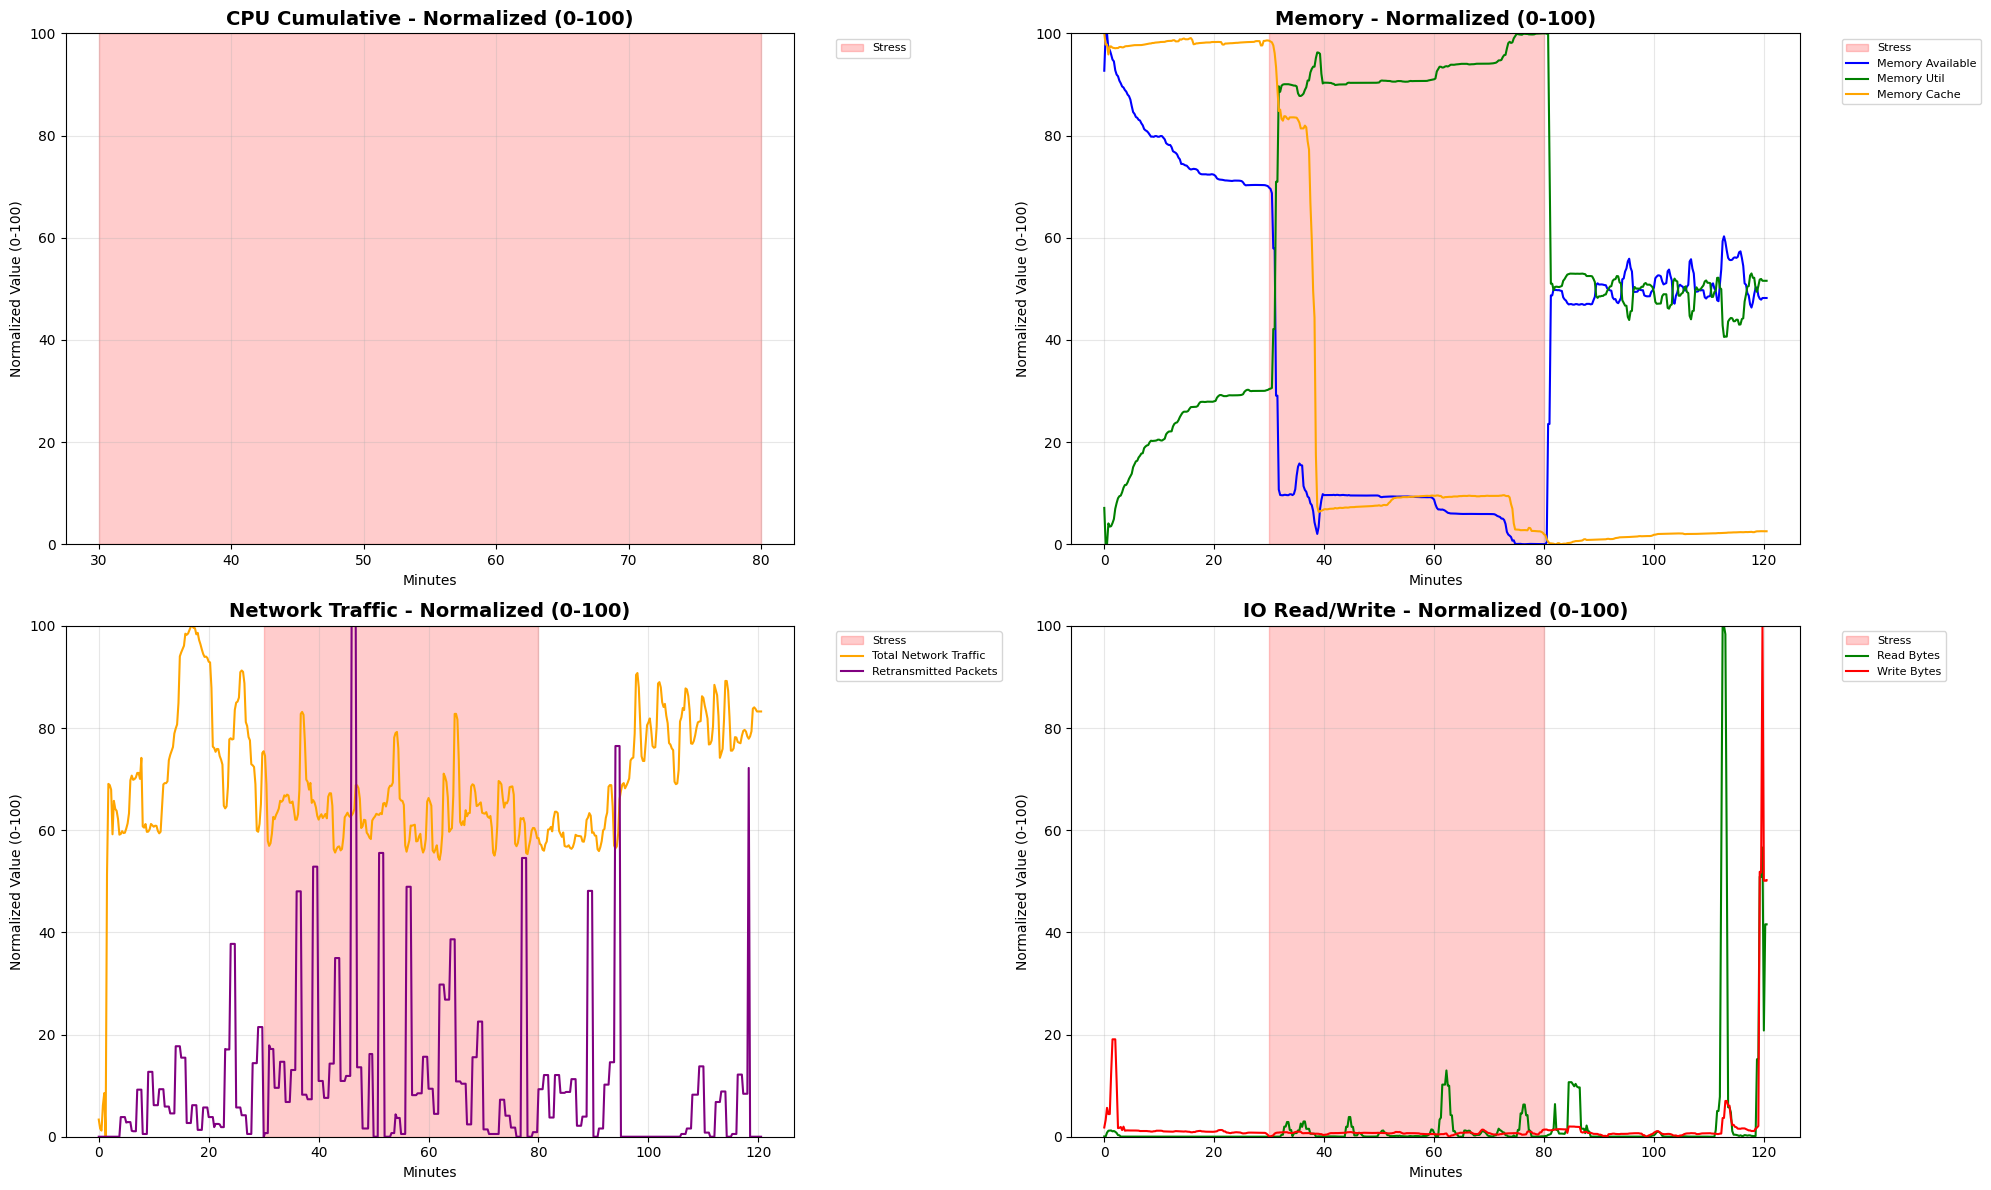

/tmp/ipykernel_1461922/10951483.py:265: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')  # puoi anche usare 'Set2', 'Dark2', ecc.


IndexError: list index out of range

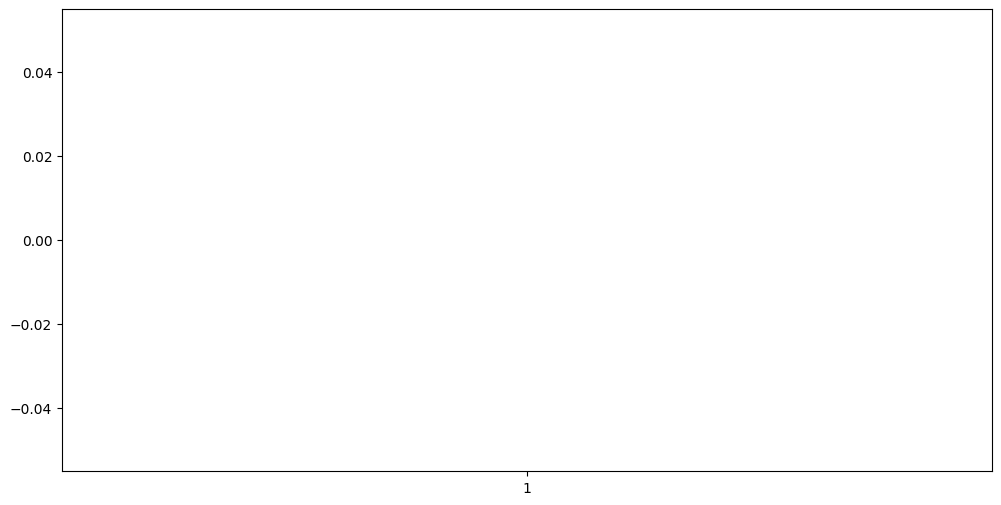

In [6]:
def normalize_0_100(series: pd.Series) -> pd.Series:
    min_val = series.min()
    max_val = series.max()
    if pd.isna(min_val) or pd.isna(max_val) or min_val == max_val:
        return pd.Series([0] * len(series), index=series.index)
    return (series - min_val) / (max_val - min_val) * 100

def process_series_for_plot(series: pd.Series, normalize: bool = True):
    if normalize:
        return normalize_0_100(series)
    else:
        return series

def calculate_cpu_cumulative(df: pd.DataFrame, metric_type: str):
    cpu_cols = [col for col in df.columns if metric_type.lower() in col.lower() 
                and 'cpu' in col.lower() and 'minutes' not in col.lower()]
    
    if not cpu_cols:
        return None
    
    # Filter only numeric columns
    numeric_cols = []
    for col in cpu_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    
    if not numeric_cols:
        return None
    
    return df[numeric_cols].sum(axis=1)

def calculate_tcp_non_srtt_cumulative(df: pd.DataFrame):
    tcp_cols = []
    for col in df.columns:
        col_lower = col.lower()
        if any(tcp_term in col_lower for tcp_term in ['api', 'service', 'gateway', 'customer', 'vet', 'visit']) and 'srtt' not in col_lower and 'minutes' not in col_lower:
            tcp_cols.append(col)
    
    if not tcp_cols:
        return None
    
    # Filter only numeric columns
    numeric_cols = []
    for col in tcp_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    
    if not numeric_cols:
        return None
    
    return df[numeric_cols].sum(axis=1)

def calculate_total_network_traffic(df: pd.DataFrame):
    srtt_cols = [col for col in df.columns if 'srtt' in col.lower() 
                 and 'minutes' not in col.lower()]
    
    if not srtt_cols:
        return None
    
    # Filter only numeric columns
    numeric_cols = []
    for col in srtt_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    
    if not numeric_cols:
        return None
    
    return df[numeric_cols].sum(axis=1)

def safe_sum_numeric_cols(df: pd.DataFrame, cols: list):
    """Safely sum only numeric columns"""
    if not cols:
        return None
    
    numeric_cols = []
    for col in cols:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    
    if not numeric_cols:
        return None
    
    return df[numeric_cols].sum(axis=1)

def plot_dashboard(df: pd.DataFrame, time_col='minutes', normalize=True):
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    
    title_suffix = "Normalized (0-100)" if normalize else "Original Values"
    ylabel = "Normalized Value (0-100)" if normalize else "Value"
    
    # CPU Plot
    ax1 = axes[0, 0]
    ax1.axvspan(30, 80, alpha=0.2, color='red', label='Stress')
    
    cpu_metrics = ['iowait', 'irq', 'system', 'user', 'utilization']
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    for i, metric in enumerate(cpu_metrics):
        cumulative = calculate_cpu_cumulative(df, metric)
        if cumulative is not None:
            processed_series = process_series_for_plot(cumulative, normalize)
            ax1.plot(df[time_col], processed_series, 
                    label=f'CPU {metric}', 
                    linewidth=1.5,
                    color=colors[i % len(colors)])
    
    ax1.set_title(f"CPU Cumulative - {title_suffix}", fontsize=14, fontweight='bold')
    ax1.set_xlabel("Minutes", fontsize=10)
    ax1.set_ylabel(ylabel, fontsize=10)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax1.grid(True, alpha=0.3)
    if normalize:
        ax1.set_ylim(0, 100)
    
    # Memory Plot
    ax2 = axes[0, 1]
    ax2.axvspan(30, 80, alpha=0.2, color='red', label='Stress')
    
    mem_available = [col for col in df.columns if 'memavailable' in col.lower() 
                     and 'minutes' not in col.lower() and pd.api.types.is_numeric_dtype(df[col])]
    mem_util = [col for col in df.columns if 'memutil' in col.lower() 
                and 'minutes' not in col.lower() and pd.api.types.is_numeric_dtype(df[col])]
    mem_cache = [col for col in df.columns if 'memcache' in col.lower() 
                 and 'minutes' not in col.lower() and pd.api.types.is_numeric_dtype(df[col])]
    
    colors = ['blue', 'green', 'orange']
    labels = ['Memory Available', 'Memory Util', 'Memory Cache']
    metric_groups = [mem_available, mem_util, mem_cache]
    
    for i, (metrics, label, color) in enumerate(zip(metric_groups, labels, colors)):
        for col in metrics:
            if col in df.columns:
                processed_series = process_series_for_plot(df[col], normalize)
                ax2.plot(df[time_col], processed_series, 
                        label=label, 
                        linewidth=1.5,
                        color=color)
                break
    
    ax2.set_title(f"Memory - {title_suffix}", fontsize=14, fontweight='bold')
    ax2.set_xlabel("Minutes", fontsize=10)
    ax2.set_ylabel(ylabel, fontsize=10)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax2.grid(True, alpha=0.3)
    if normalize:
        ax2.set_ylim(0, 100)
    
    # Network Plot
    ax3 = axes[1, 0]
    ax3.axvspan(30, 80, alpha=0.2, color='red', label='Stress')
    
    total_network_traffic = calculate_total_network_traffic(df)
    retransmitted_packets = calculate_tcp_non_srtt_cumulative(df)
    
    if total_network_traffic is not None:
        processed_traffic = process_series_for_plot(total_network_traffic, normalize)
        ax3.plot(df[time_col], processed_traffic, 
                label='Total Network Traffic', 
                linewidth=1.5,
                color='orange')
    
    if retransmitted_packets is not None:
        processed_packets = process_series_for_plot(retransmitted_packets, normalize)
        ax3.plot(df[time_col], processed_packets, 
                label='Retransmitted Packets', 
                linewidth=1.5,
                color='purple')
    
    ax3.set_title(f"Network Traffic - {title_suffix}", fontsize=14, fontweight='bold')
    ax3.set_xlabel("Minutes", fontsize=10)
    ax3.set_ylabel(ylabel, fontsize=10)
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax3.grid(True, alpha=0.3)
    if normalize:
        ax3.set_ylim(0, 100)
    
    # IO Plot
    ax4 = axes[1, 1]
    ax4.axvspan(30, 80, alpha=0.2, color='red', label='Stress')
    
    read_cols = [col for col in df.columns if 'readbytes' in col.lower() 
                 and 'minutes' not in col.lower() and pd.api.types.is_numeric_dtype(df[col])]
    write_cols = [col for col in df.columns if 'writebytes' in col.lower() 
                  and 'minutes' not in col.lower() and pd.api.types.is_numeric_dtype(df[col])]
    
    read_cumulative = safe_sum_numeric_cols(df, read_cols)
    write_cumulative = safe_sum_numeric_cols(df, write_cols)
    
    if read_cumulative is not None:
        processed_read = process_series_for_plot(read_cumulative, normalize)
        ax4.plot(df[time_col], processed_read, 
                label='Read Bytes', 
                linewidth=1.5,
                color='green')
    
    if write_cumulative is not None:
        processed_write = process_series_for_plot(write_cumulative, normalize)
        ax4.plot(df[time_col], processed_write, 
                label='Write Bytes', 
                linewidth=1.5,
                color='red')
    
    ax4.set_title(f"IO Read/Write - {title_suffix}", fontsize=14, fontweight='bold')
    ax4.set_xlabel("Minutes", fontsize=10)
    ax4.set_ylabel(ylabel, fontsize=10)
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax4.grid(True, alpha=0.3)
    if normalize:
        ax4.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
print(all_datasets)

def plot_boxplot(df: pd.DataFrame, area: str, time_col='minutes', normalize=True):
    assert area in ['cpu', 'memory', 'network', 'io'], "Area must be one of: 'cpu', 'memory', 'network', 'io'"
    
    if area == 'cpu':
        metrics = ['iowait', 'irq', 'system', 'user', 'utilization']
        get_series = lambda metric: calculate_cpu_cumulative(df, metric)
        title = "CPU Metrics"
    
    elif area == 'memory':
        mem_cols = {
            'memavailable': 'Memory Available',
            'memutil': 'Memory Util',
            'memcache': 'Memory Cache'
        }
        metrics = list(mem_cols.keys())
        labels_map = mem_cols
        get_series = lambda metric: df[[col for col in df.columns if metric in col.lower() and pd.api.types.is_numeric_dtype(df[col])]].iloc[:, 0]
        title = "Memory Metrics"
    
    elif area == 'network':
        metrics = ['total_traffic', 'retransmitted']
        labels_map = {
            'total_traffic': 'Total Network Traffic',
            'retransmitted': 'Retransmitted Packets'
        }
        get_series = lambda metric: calculate_total_network_traffic(df) if metric == 'total_traffic' else calculate_tcp_non_srtt_cumulative(df)
        title = "Network Metrics"
    
    elif area == 'io':
        metrics = ['read', 'write']
        labels_map = {
            'read': 'Read Bytes',
            'write': 'Write Bytes'
        }
        get_series = lambda metric: (
            safe_sum_numeric_cols(df, [col for col in df.columns if 'readbytes' in col.lower()])
            if metric == 'read'
            else safe_sum_numeric_cols(df, [col for col in df.columns if 'writebytes' in col.lower()])
        )
        title = "IO Metrics"

    # Maschere temporali
    phase_masks = {
        'Pre': df[time_col] < 30,
        'During': (df[time_col] >= 30) & (df[time_col] <= 80),
        'Post': df[time_col] > 80
    }

    # Colori distinti per ogni metrica
    cmap = cm.get_cmap('tab10')  # puoi anche usare 'Set2', 'Dark2', ecc.
    metric_colors = {metric: cmap(i % 10) for i, metric in enumerate(metrics)}

    box_data = []
    xtick_labels = []
    box_colors = []

    for phase in ['Pre', 'During', 'Post']:
        mask = phase_masks[phase]
        for metric in metrics:
            series = get_series(metric)
            if series is None:
                continue
            if normalize:
                series = normalize_0_100(series)
            values = series[mask].dropna()
            if values.empty:
                continue
            box_data.append(values)
            label = labels_map[metric] if 'labels_map' in locals() else metric
            xtick_labels.append(f"{label}\n{phase}")
            box_colors.append(metric_colors[metric])

    # Plot
    plt.figure(figsize=(max(12, len(box_data)*1.2), 6))
    bplots = plt.boxplot(box_data, patch_artist=True)

    for i, patch in enumerate(bplots['boxes']):
        patch.set_facecolor(box_colors[i])
        patch.set_edgecolor('black')

    # Etichette asse X
    plt.xticks(ticks=range(1, len(xtick_labels) + 1), labels=xtick_labels, rotation=45, ha='right')

    # Zona stress evidenziata
    num_metrics = len(metrics)
    plt.axvspan(num_metrics + 0.5, 2 * num_metrics + 0.5, alpha=0.08, color='red', label='Stress Phase')

    plt.ylabel("Normalized Value (0-100)" if normalize else "Value")
    plt.title(f"{title} - Phase Comparison by Metric", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.3)

    # Legenda dei colori per metrica
    legend_handles = [
        plt.Line2D([0], [0], color=metric_colors[metric], lw=6, label=labels_map[metric] if 'labels_map' in locals() else metric)
        for metric in metrics
    ]
    plt.legend(
    handles=legend_handles,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    title='Metric'
)


    plt.tight_layout()
    plt.show()

EXPERIMENT = 'customers_mem_stress'
experiments = ['cpu', 'memory', 'network', 'io']

plot_dashboard(all_datasets[EXPERIMENT], normalize=True)

for area in experiments:
    plot_boxplot(all_datasets[EXPERIMENT], area)

In [7]:
def add_failure_feature(df, time_col='minutes'):
    """Add failure feature based on time window (30-80 minutes)"""
    df = df.copy()
    
    if time_col not in df.columns:
        raise ValueError(f"Time column '{time_col}' not found")
    
    df[time_col] = pd.to_numeric(df[time_col], errors='coerce')
    df['Failure'] = 0
    df.loc[(df[time_col] >= 30) & (df[time_col] < 80), 'Failure'] = 1
    
    return df

def add_failure_to_all_datasets(all_datasets):
    """Add failure labels to all datasets permanently"""
    updated_datasets = {}
    
    for name, df in all_datasets.items():
        df_copy = df.copy()
        
        if 'baseline' in name.lower():
            df_copy['Failure'] = 0
        else:
            df_copy = add_failure_feature(df_copy)
        
        updated_datasets[name] = df_copy
    
    return updated_datasets

all_datasets = add_failure_to_all_datasets(all_datasets)

df_all_copy = df_all.copy()
df_all_copy['Failure'] = 0

# For non-baseline experiments, add failure based on time
non_baseline_mask = ~df_all_copy['source'].str.contains('BASELINE', case=False, na=False)
time_mask = (df_all_copy['minutes'] >= 30) & (df_all_copy['minutes'] < 80)
failure_mask = non_baseline_mask & time_mask

df_all_copy.loc[failure_mask, 'Failure'] = 1

# Update df_all permanently
df_all = df_all_copy

print("Failure feature added permanently to all datasets")
print(f"Individual datasets with Failure column: {[name for name in all_datasets.keys() if 'Failure' in all_datasets[name].columns]}")
print(f"df_all has Failure column: {'Failure' in df_all.columns}")
print(f"df_all failure distribution: {df_all['Failure'].value_counts().to_dict()}")

# Now run the correlation analysis with permanently added Failure column
def analyze_all_datasets_with_failure(all_datasets, target_col='Failure', top_n=15):
    all_correlations = {}
    
    for dataset_name, df in all_datasets.items():
        # No need to add Failure column - it's already there permanently
        corr_df = failure_correlations(df, target_col)
        if corr_df is not None:
            all_correlations[dataset_name] = corr_df
            plot_failure_correlations(df, target_col, top_n, dataset_name)
    
    return all_correlations

def run_failure_analysis_permanent(all_datasets):
    """Run failure analysis with permanently added Failure columns"""
    # Exclude baseline from analysis
    datasets_to_analyze = {k: v for k, v in all_datasets.items() if 'baseline' not in k.lower()}
    
    all_correlations = analyze_all_datasets_with_failure(datasets_to_analyze)
    comparison_heatmap = plot_correlation_heatmap(all_correlations, top_features=None)  
    return all_correlations, comparison_heatmap

# Run the analysis with permanent Failure columns
all_correlations, heatmap = run_failure_analysis_permanent(all_datasets)

# Analyze constant features
constant_analysis = analyze_constant_features_in_correlations(all_correlations)

TypeError: '>=' not supported between instances of 'str' and 'int'

## heatmap per experiment

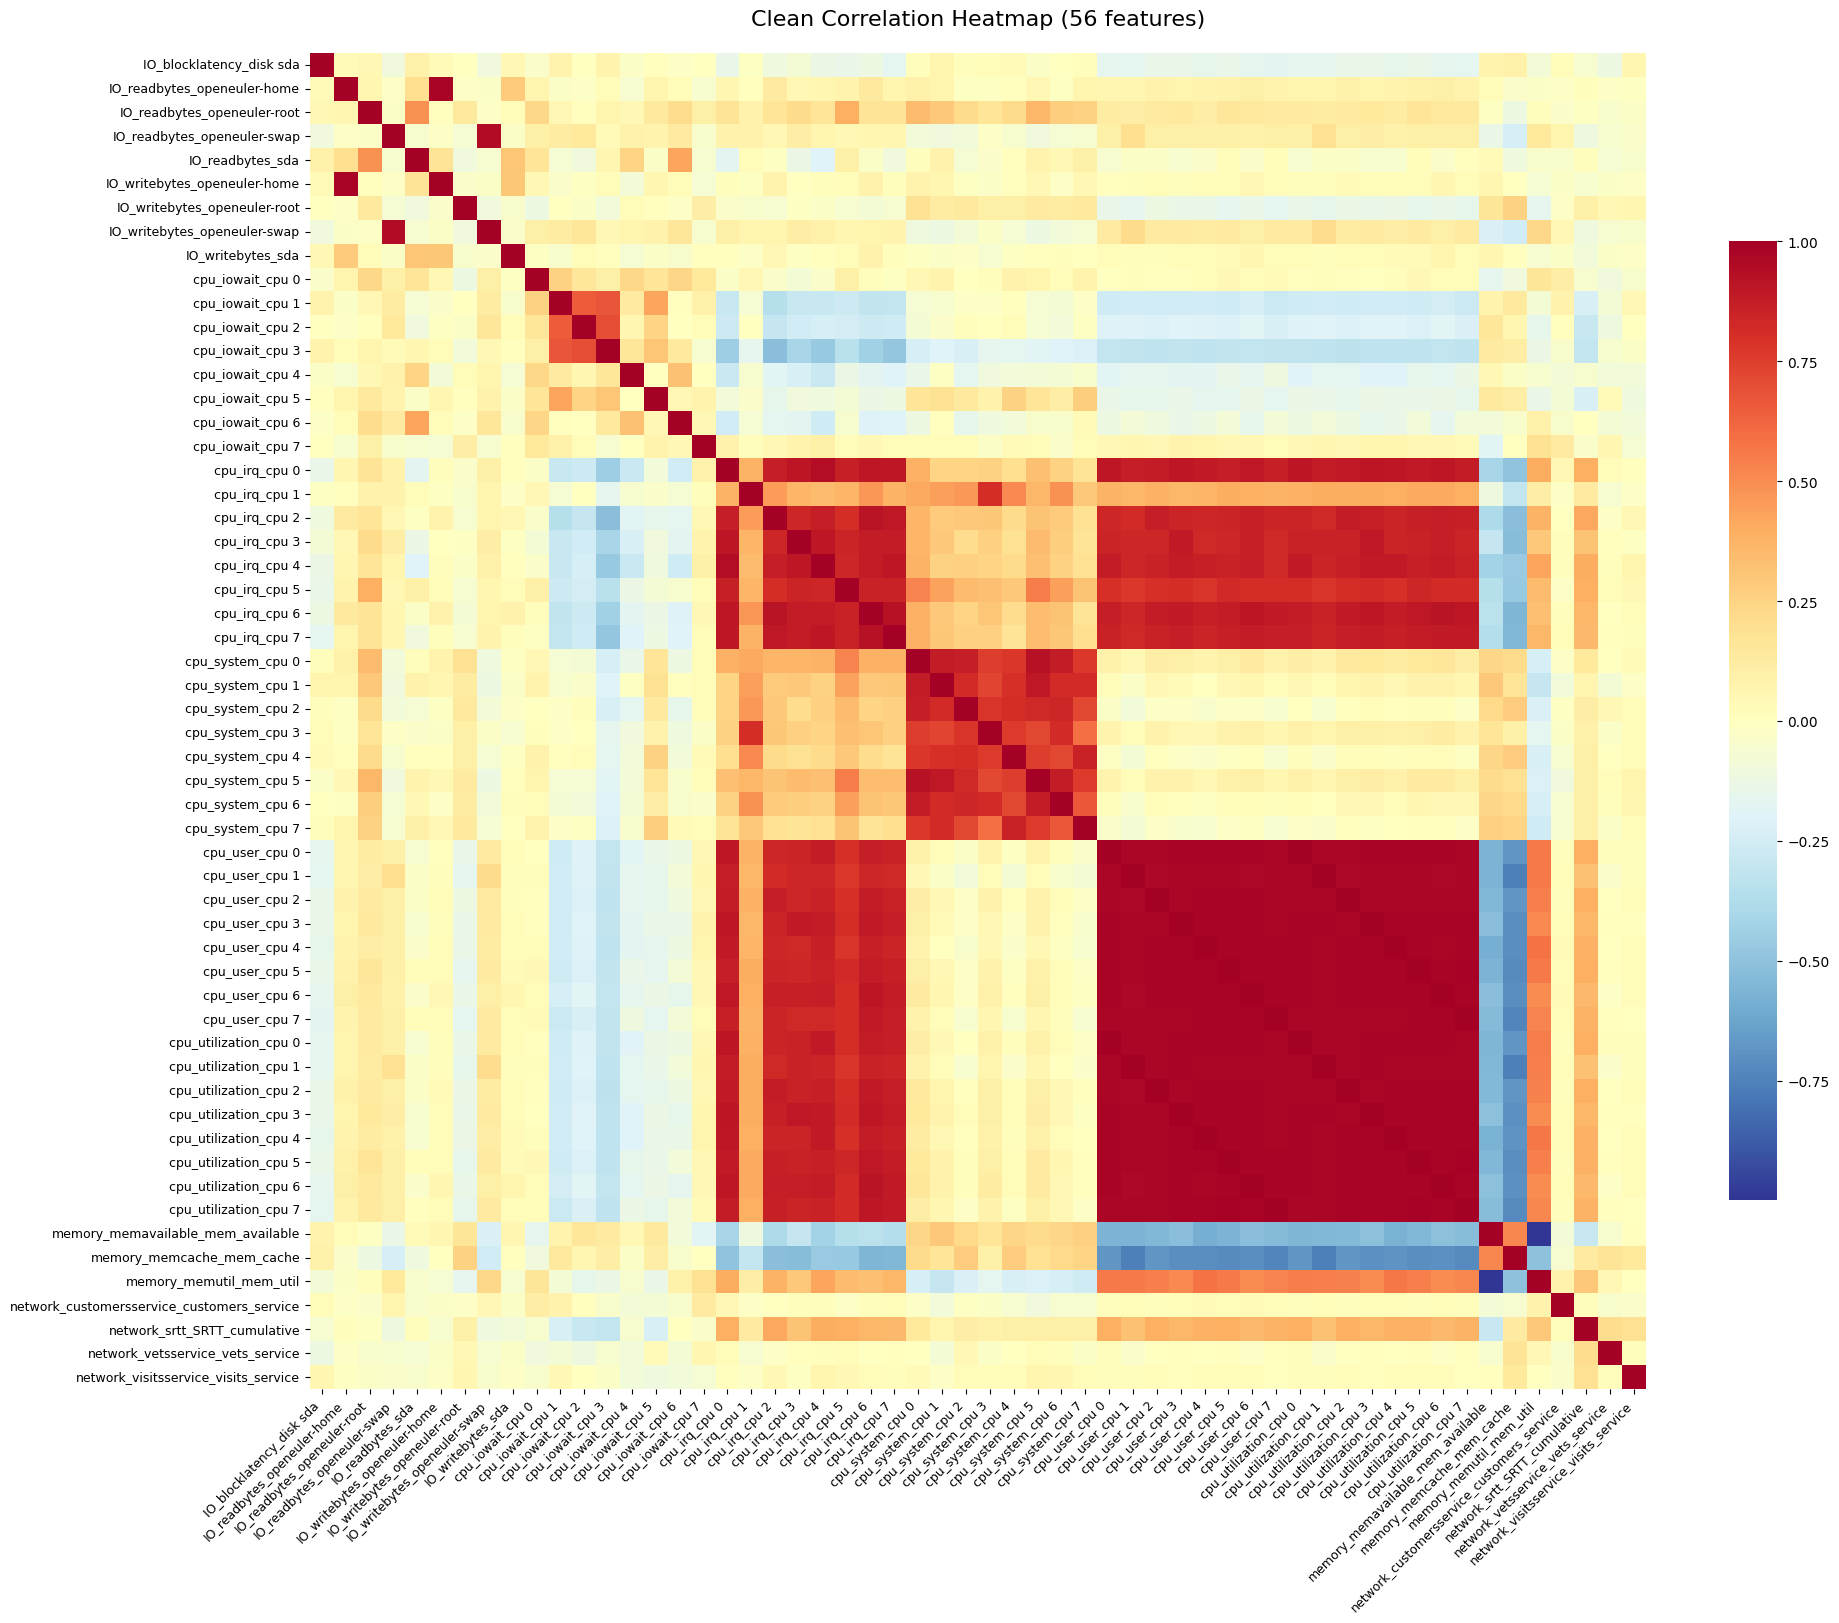

,IO_blocklatency_disk sda,IO_readbytes_openeuler-home,IO_readbytes_openeuler-root,IO_readbytes_openeuler-swap,IO_readbytes_sda,IO_writebytes_openeuler-home,IO_writebytes_openeuler-root,IO_writebytes_openeuler-swap,IO_writebytes_sda,cpu_iowait_cpu 0,...,cpu_utilization_cpu 5,cpu_utilization_cpu 6,cpu_utilization_cpu 7,memory_memavailable_mem_available,memory_memcache_mem_cache,memory_memutil_mem_util,network_customersservice_customers_service,network_srtt_SRTT_cumulative,network_vetsservice_vets_service,network_visitsservice_visits_service
IO_blocklatency_disk sda,1.000000,0.033349,0.040511,-0.100004,0.093005,0.035297,-0.003911,-0.097818,0.040947,-0.034820,...,-0.146170,-0.160466,-0.170845,0.074644,0.086477,-0.078451,0.019186,-0.060587,-0.119276,0.057947
IO_readbytes_openeuler-home,0.033349,1.000000,0.061702,-0.018483,0.196309,0.979568,-0.021156,-0.024926,0.286561,0.070363,...,0.087862,0.109422,0.075745,0.024315,-0.033847,-0.027025,-0.021261,0.010922,-0.022523,-0.014451
IO_readbytes_openeuler-root,0.040511,0.061702,1.000000,-0.023376,0.485578,0.006340,0.138596,-0.019161,0.021197,0.230410,...,0.166526,0.140667,0.137048,-0.013549,-0.118091,0.009882,-0.038564,-0.007507,-0.039901,-0.025630
IO_readbytes_openeuler-swap,-0.100004,-0.018483,-0.023376,1.000000,-0.050101,-0.021587,-0.064504,0.952182,-0.025093,0.097127,...,0.101966,0.094490,0.107480,-0.138700,-0.235833,0.146136,0.068831,-0.110718,-0.049917,-0.032028
IO_readbytes_sda,0.093005,0.196309,0.485578,-0.050101,1.000000,0.173676,-0.098779,-0.058080,0.311475,0.165186,...,0.020646,-0.037311,0.004761,0.033157,-0.108266,-0.040864,-0.046394,0.015819,-0.067297,-0.043460
IO_writebytes_openeuler-home,0.035297,0.979568,0.006340,-0.021587,0.173676,1.000000,-0.035995,-0.029035,0.302840,0.046097,...,0.031129,0.055621,0.020257,0.059727,-0.001139,-0.062358,-0.023586,-0.052141,-0.025718,-0.016006
IO_writebytes_openeuler-root,-0.003911,-0.021156,0.138596,-0.064504,-0.098779,-0.035995,1.000000,-0.100760,-0.044081,-0.121687,...,-0.148667,-0.133670,-0.155297,0.160661,0.255924,-0.157323,-0.016912,0.095524,0.046351,0.059758
IO_writebytes_openeuler-swap,-0.097818,-0.024926,-0.019161,0.952182,-0.058080,-0.029035,-0.100760,1.000000,-0.034081,0.102815,...,0.126560,0.107411,0.126052,-0.223766,-0.257262,0.231136,0.054313,-0.102053,-0.061091,-0.042232
IO_writebytes_sda,0.040947,0.286561,0.021197,-0.025093,0.311475,0.302840,-0.044081,-0.034081,1.000000,-0.008011,...,0.031898,0.063665,0.029804,0.059426,0.007260,-0.062067,-0.030435,-0.089002,-0.027586,-0.016358
cpu_iowait_cpu 0,-0.034820,0.070363,0.230410,0.097127,0.165186,0.046097,-0.121687,0.102815,-0.008011,1.000000,...,0.040361,0.021355,0.028657,-0.159816,-0.097674,0.157445,0.112213,-0.051236,-0.096184,-0.045402


In [4]:
def heatmap(data, title="Clean Correlation Heatmap", show_labels=True):
    numeric_data = data.select_dtypes(include=[np.number])
    
    if 'minutes' in numeric_data.columns:
        numeric_data = numeric_data.drop(columns=['minutes'])
    
    cpu_8_9_cols = [col for col in numeric_data.columns if 'cpu_8' in col or 'cpu_9' in col or 'cpu 8' in col or 'cpu 9' in col]
    if cpu_8_9_cols:
        numeric_data = numeric_data.drop(columns=cpu_8_9_cols)
    
    zero_variance_cols = []
    for col in numeric_data.columns:
        if numeric_data[col].var() == 0 or numeric_data[col].sum() == 0:
            zero_variance_cols.append(col)
    
    if zero_variance_cols:
        numeric_data = numeric_data.drop(columns=zero_variance_cols)
    
    nan_threshold = len(numeric_data) * 0.5
    high_nan_cols = [col for col in numeric_data.columns if numeric_data[col].isnull().sum() > nan_threshold]
    
    if high_nan_cols:
        numeric_data = numeric_data.drop(columns=high_nan_cols)
    
    numeric_data = numeric_data.fillna(0)
    corr = numeric_data.corr()
    corr = corr.fillna(0)
    
    if show_labels:
        fig, ax = plt.subplots(figsize=(20, 18))
    else:
        fig, ax = plt.subplots(figsize=(16, 14))
    
    sns.heatmap(corr, 
                cmap='RdYlBu_r', 
                center=0,
                square=True,
                cbar_kws={"shrink": .6},
                xticklabels=show_labels,
                yticklabels=show_labels,
                ax=ax)
    
    ax.set_title(f'{title} ({len(corr)} features)', fontsize=16, pad=20)
    
    if show_labels:
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        plt.subplots_adjust(bottom=0.2, left=0.2)
    else:
        ax.set_xlabel('')
        ax.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    return corr

def labeled_heatmap(data):
    return heatmap(data, show_labels=True)

labeled_heatmap(all_datasets['gatewaymem_stress'])

Failure feature added permanently to all datasets
Individual datasets with Failure column: ['customersnet_loss', 'customersmem_stress', 'customersIO pressure', 'customersbaseline', 'customerscpu_stress', 'gatewaynet_loss', 'gatewaymem_stress', 'gatewaydelay', 'gatewaybaseline', 'gatewaycpu_stress']
df_all has Failure column: True
df_all failure distribution: {0: 3269, 1: 1614}


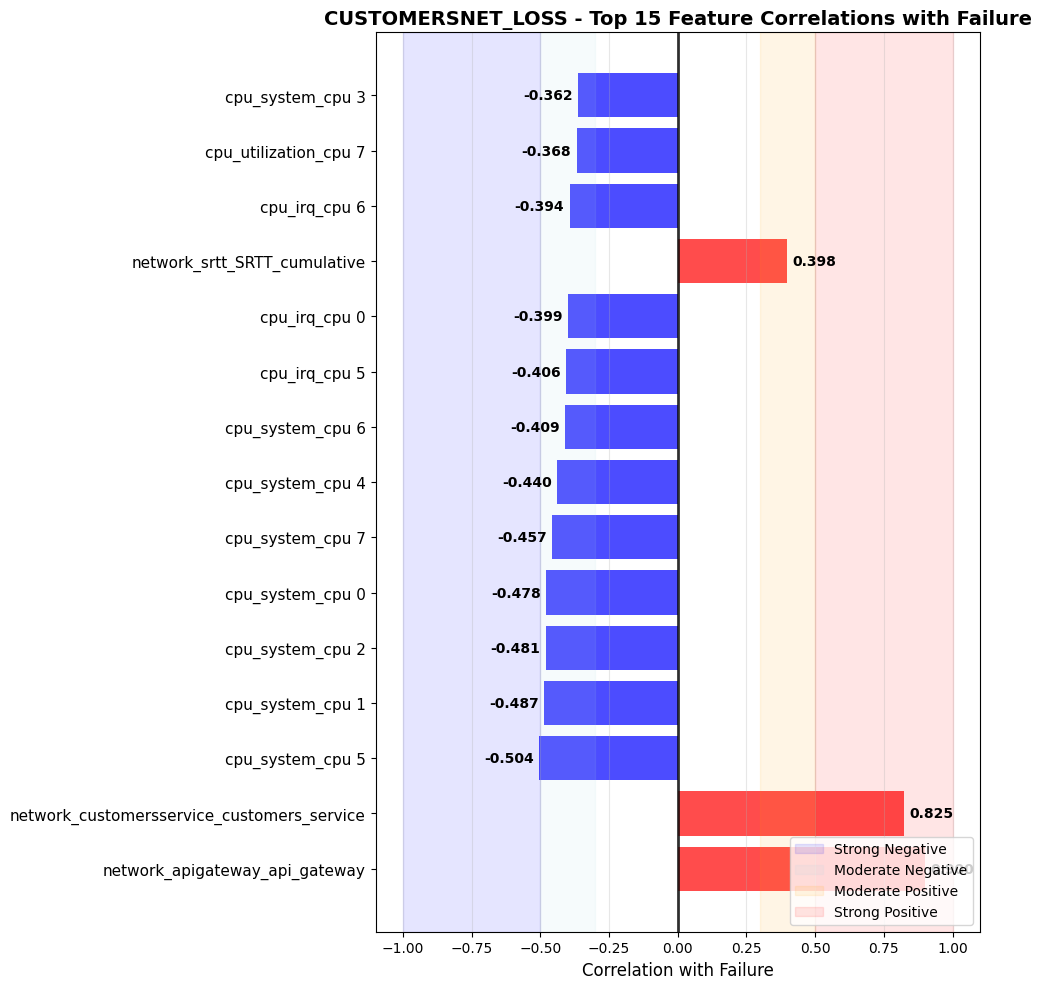

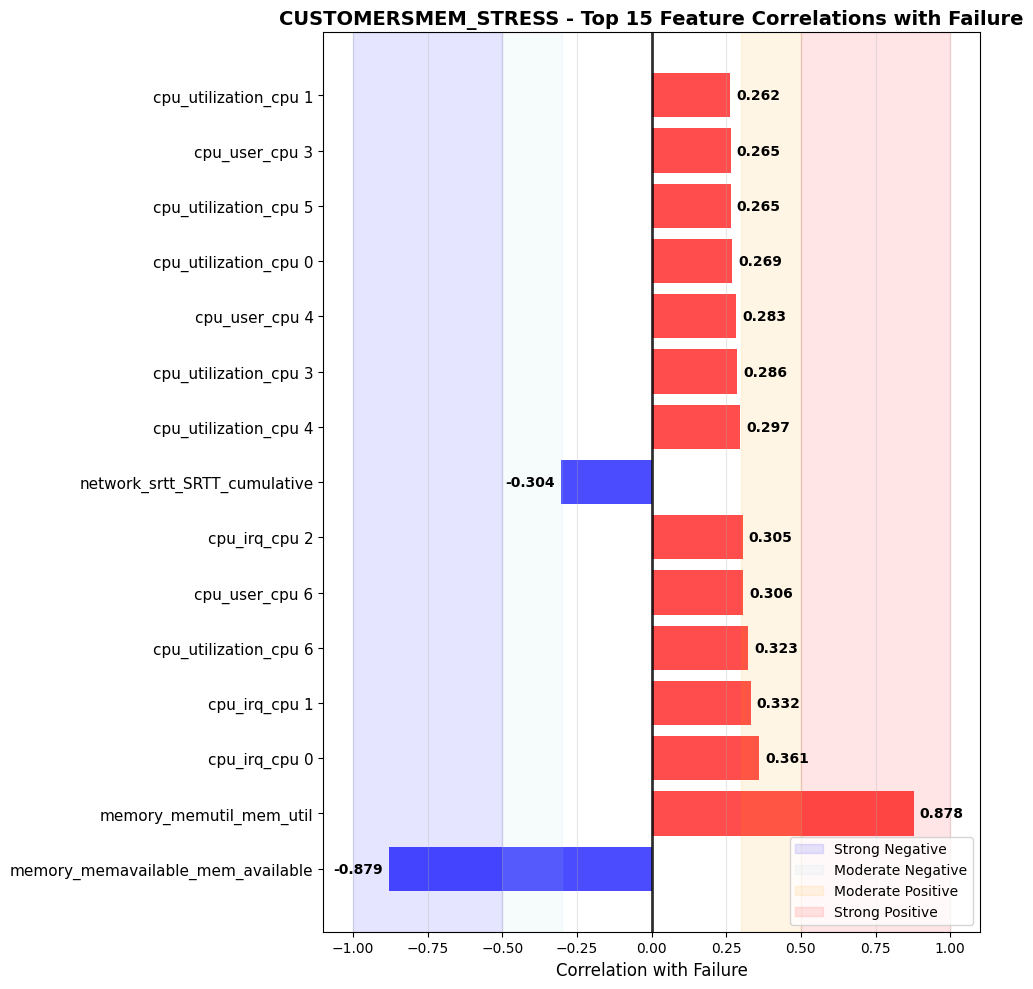

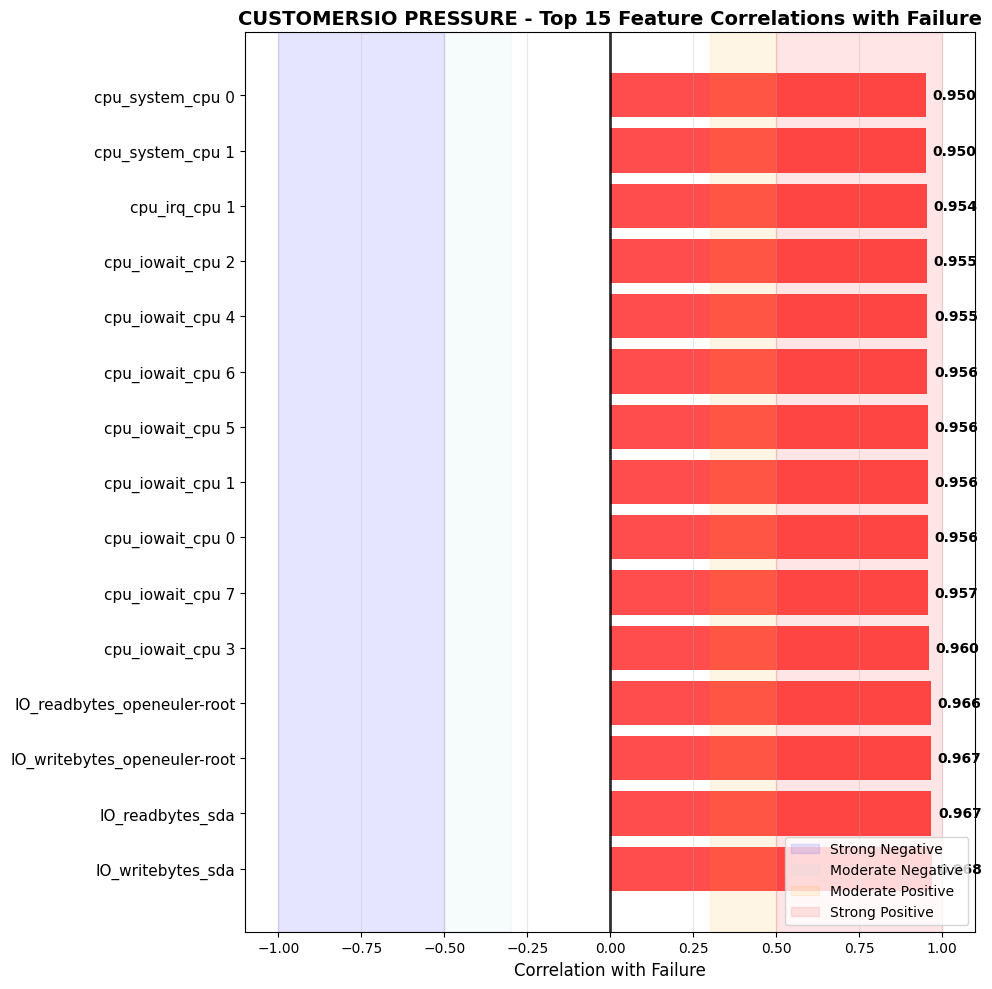

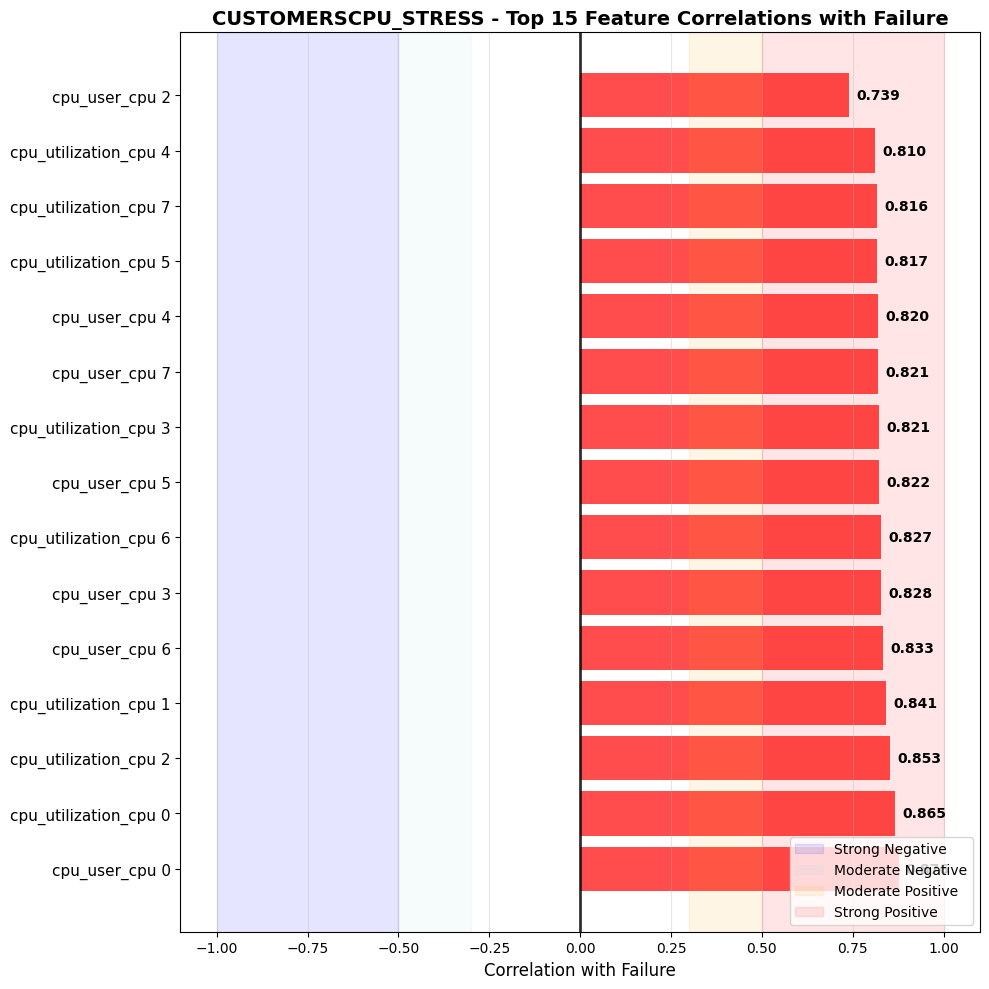

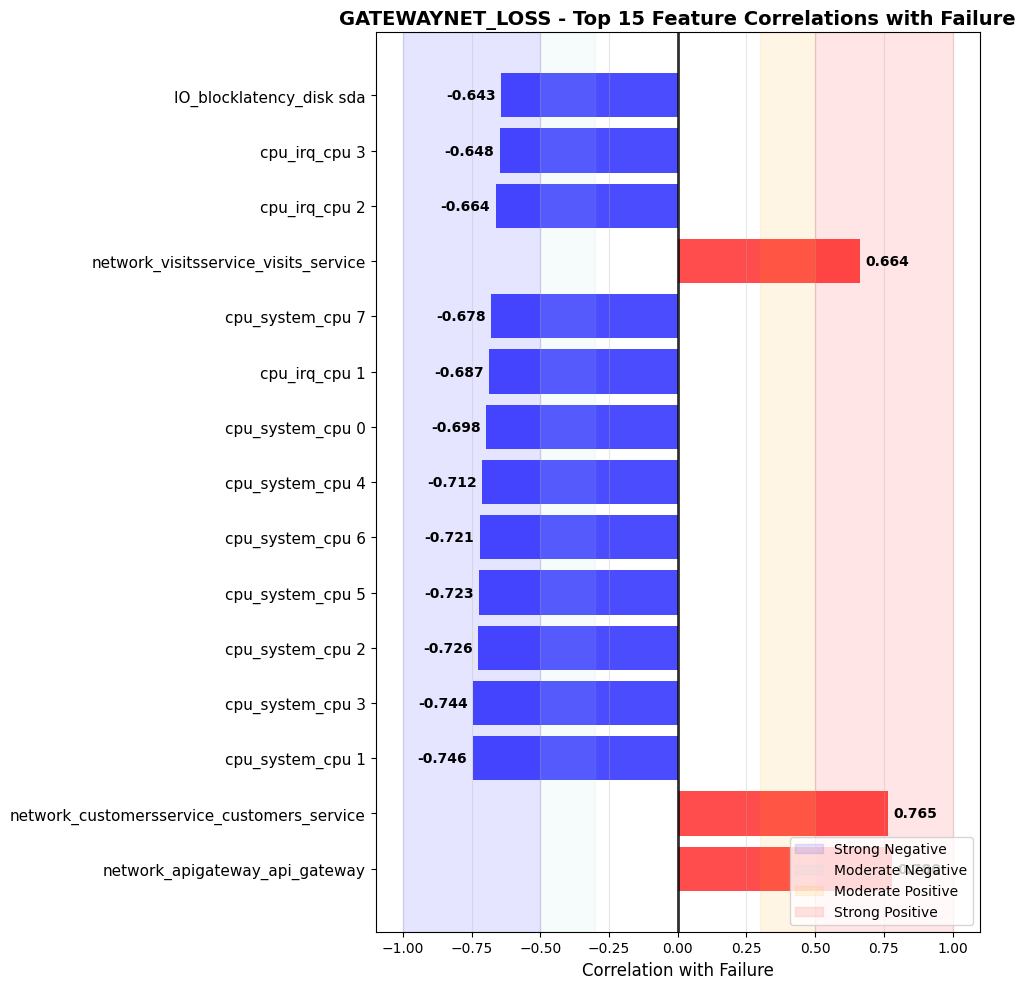

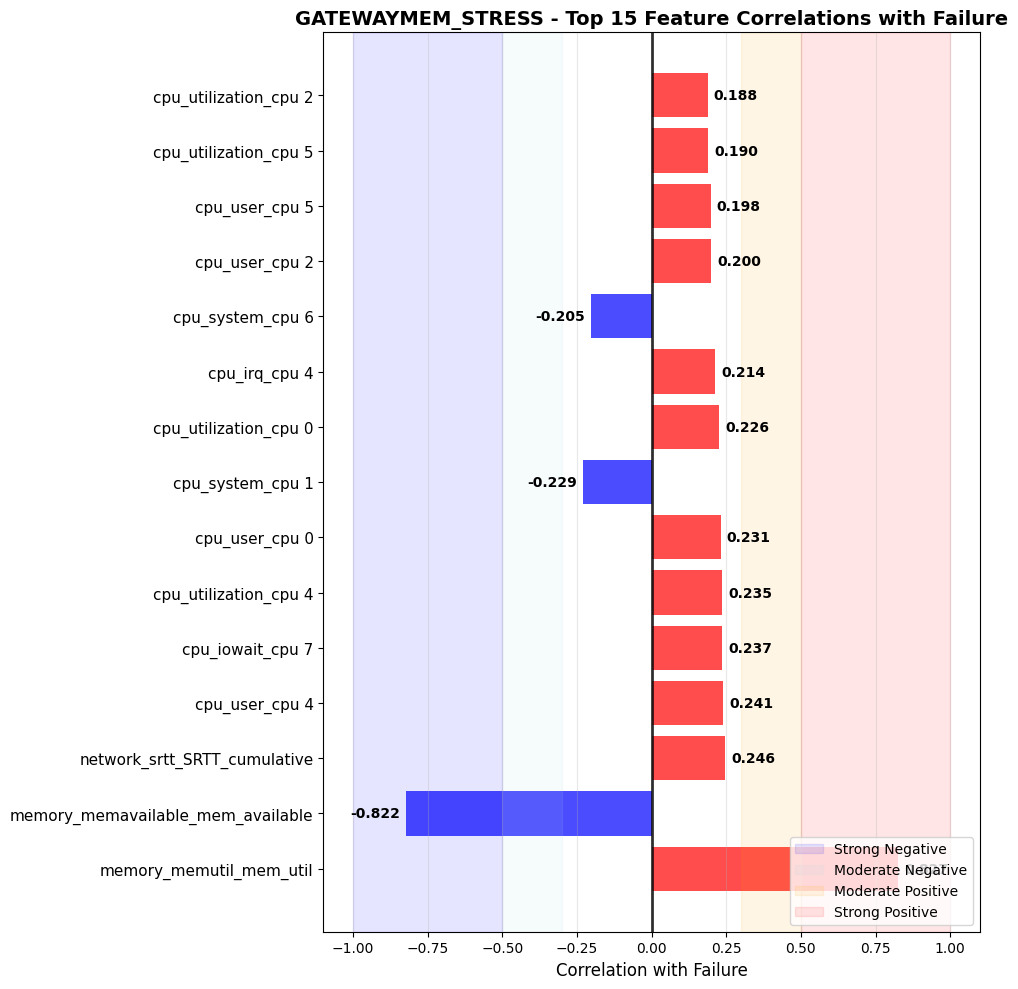

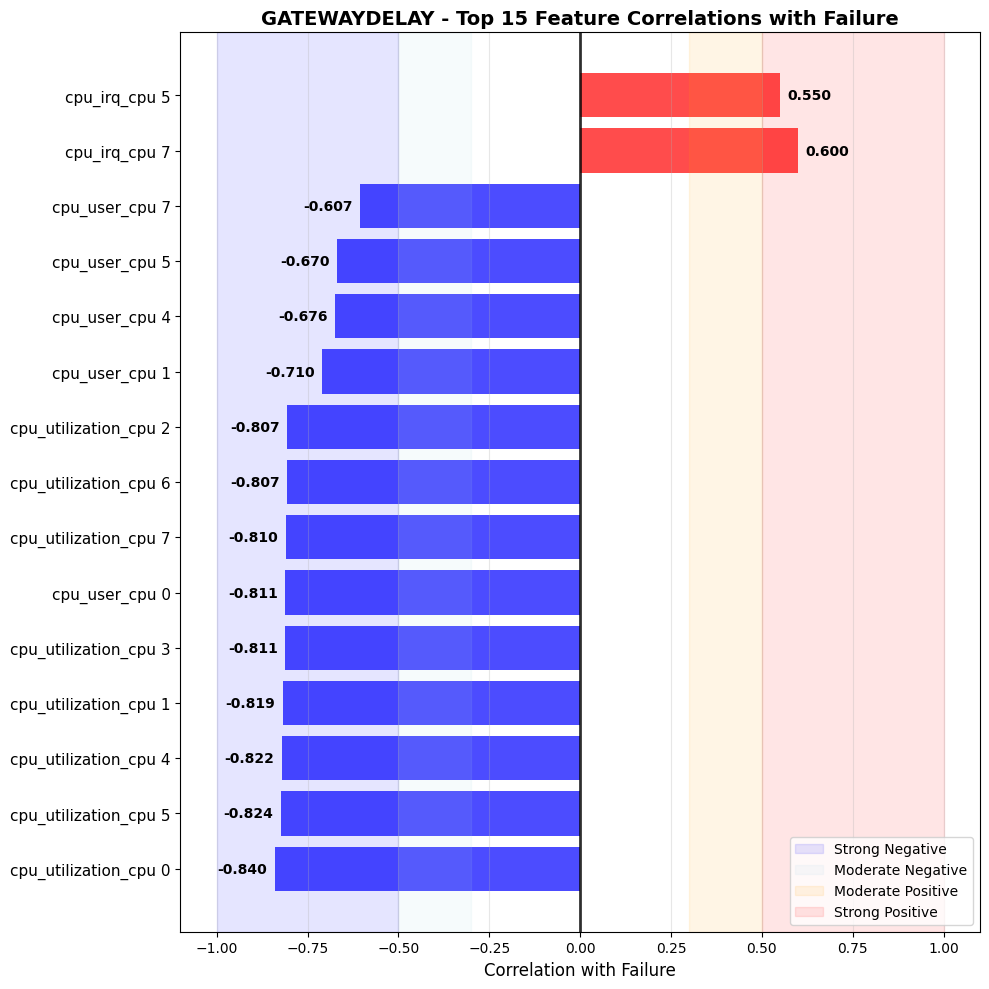

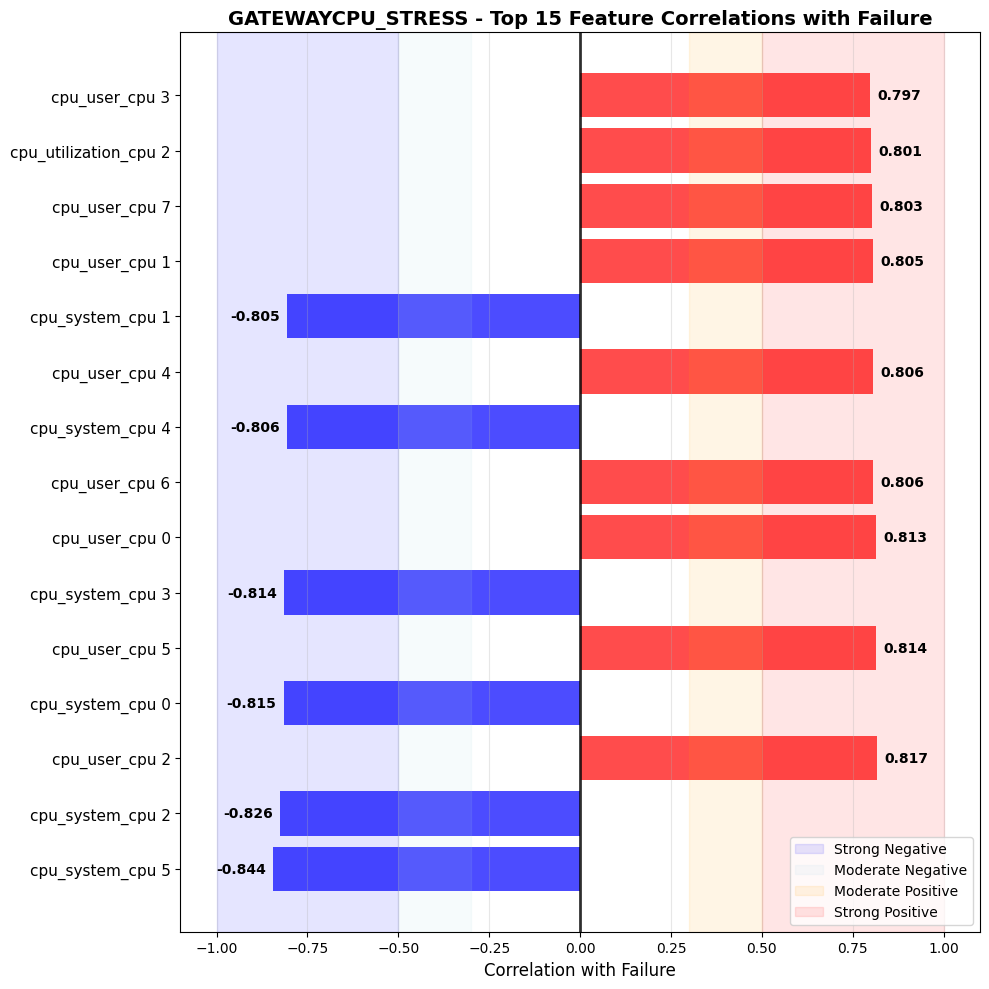

/tmp/ipykernel_100619/3885862694.py:129: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_annot = annot_matrix.applymap(lambda x: '0' if abs(x) < 1e-10 else f'{x:.3f}')


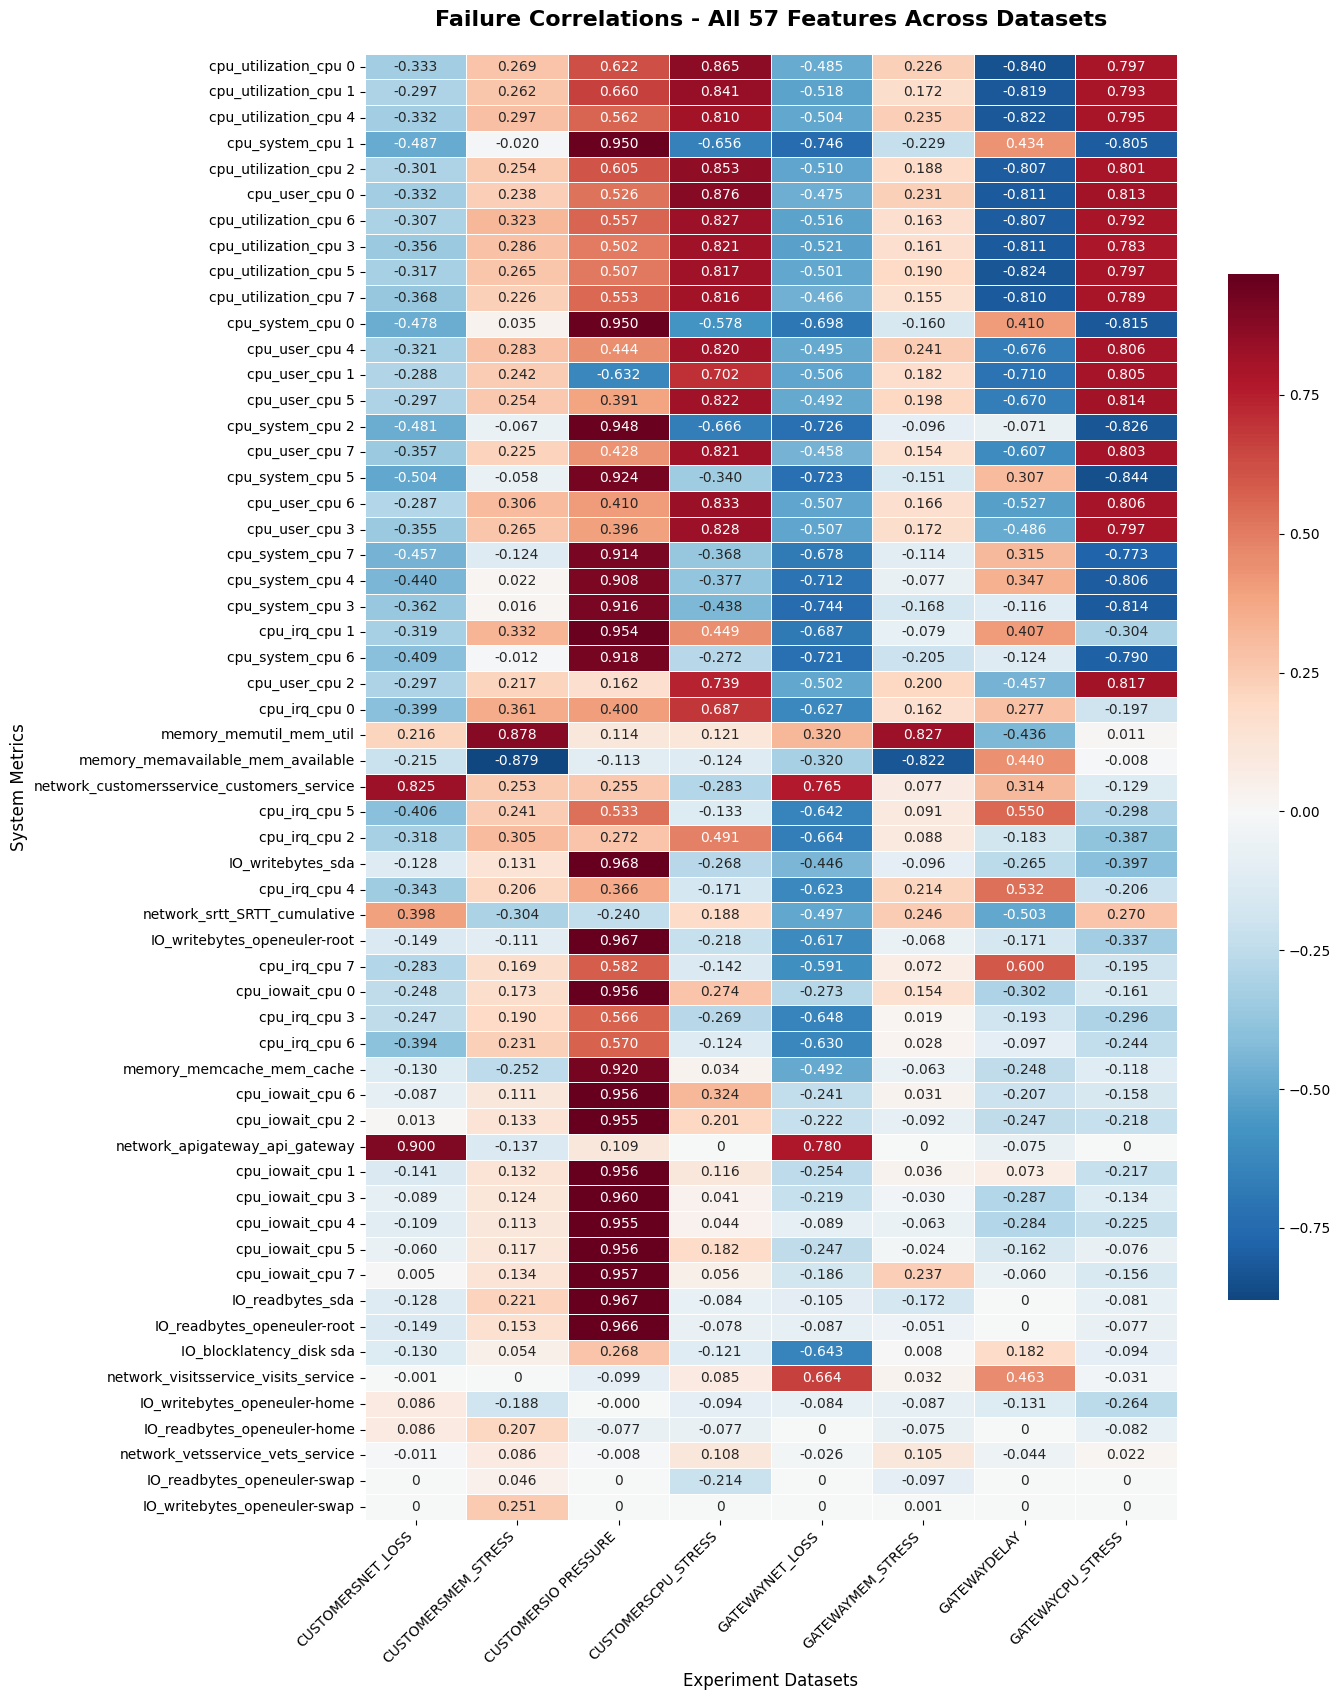

CONSTANT FEATURES IN CORRELATION ANALYSIS

CUSTOMERSNET_LOSS:
  Constant features: 2
    - IO_readbytes_openeuler-swap
    - IO_writebytes_openeuler-swap

CUSTOMERSMEM_STRESS:
  Constant features: 1
    - network_visitsservice_visits_service

CUSTOMERSIO PRESSURE:
  Constant features: 2
    - IO_readbytes_openeuler-swap
    - IO_writebytes_openeuler-swap

CUSTOMERSCPU_STRESS:
  Constant features: 2
    - IO_writebytes_openeuler-swap
    - network_apigateway_api_gateway

GATEWAYNET_LOSS:
  Constant features: 3
    - IO_readbytes_openeuler-swap
    - IO_writebytes_openeuler-swap
    - IO_readbytes_openeuler-home

GATEWAYMEM_STRESS:
  Constant features: 1
    - network_apigateway_api_gateway

GATEWAYDELAY:
  Constant features: 5
    - IO_readbytes_sda
    - IO_writebytes_openeuler-swap
    - IO_readbytes_openeuler-swap
    - IO_readbytes_openeuler-root
    - IO_readbytes_openeuler-home

GATEWAYCPU_STRESS:
  Constant features: 3
    - IO_writebytes_openeuler-swap
    - IO_readbytes_openeul

In [ ]:
def add_failure_feature(df, time_col='minutes'):
    """Add failure feature based on time window (30-80 minutes)"""
    df = df.copy()
    
    if time_col not in df.columns:
        raise ValueError(f"Time column '{time_col}' not found")
    
    df[time_col] = pd.to_numeric(df[time_col], errors='coerce')
    df['Failure'] = 0
    df.loc[(df[time_col] >= 30) & (df[time_col] < 80), 'Failure'] = 1
    
    return df

def add_failure_to_all_datasets(all_datasets):
    """Add failure labels to all datasets permanently"""
    updated_datasets = {}
    
    for name, df in all_datasets.items():
        df_copy = df.copy()
        
        if 'baseline' in name.lower():
            df_copy['Failure'] = 0
        else:
            df_copy = add_failure_feature(df_copy)
        
        updated_datasets[name] = df_copy
    
    return updated_datasets

all_datasets = add_failure_to_all_datasets(all_datasets)

df_all_copy = df_all.copy()
df_all_copy['Failure'] = 0

# For non-baseline experiments, add failure based on time
non_baseline_mask = ~df_all_copy['source'].str.contains('BASELINE', case=False, na=False)
time_mask = (df_all_copy['minutes'] >= 30) & (df_all_copy['minutes'] < 80)
failure_mask = non_baseline_mask & time_mask

df_all_copy.loc[failure_mask, 'Failure'] = 1

# Update df_all permanently
df_all = df_all_copy

print("Failure feature added permanently to all datasets")
print(f"Individual datasets with Failure column: {[name for name in all_datasets.keys() if 'Failure' in all_datasets[name].columns]}")
print(f"df_all has Failure column: {'Failure' in df_all.columns}")
print(f"df_all failure distribution: {df_all['Failure'].value_counts().to_dict()}")

# Now run the correlation analysis with permanently added Failure column
def analyze_all_datasets_with_failure(all_datasets, target_col='Failure', top_n=15):
    all_correlations = {}
    
    for dataset_name, df in all_datasets.items():
        # No need to add Failure column - it's already there permanently
        corr_df = failure_correlations(df, target_col)
        if corr_df is not None:
            all_correlations[dataset_name] = corr_df
            plot_failure_correlations(df, target_col, top_n, dataset_name)
    
    return all_correlations

def run_failure_analysis_permanent(all_datasets):
    """Run failure analysis with permanently added Failure columns"""
    # Exclude baseline from analysis
    datasets_to_analyze = {k: v for k, v in all_datasets.items() if 'baseline' not in k.lower()}
    
    all_correlations = analyze_all_datasets_with_failure(datasets_to_analyze)
    comparison_heatmap = plot_correlation_heatmap(all_correlations, top_features=None)  
    return all_correlations, comparison_heatmap

# Run the analysis with permanent Failure columns
all_correlations, heatmap = run_failure_analysis_permanent(all_datasets)

# Analyze constant features
constant_analysis = analyze_constant_features_in_correlations(all_correlations)

## check failure target settings

In [15]:
# Display all rows of df_all with various viewing options

# Option 1: Display basic info about df_all
print("DF_ALL BASIC INFO:")
print("="*50)
print(f"Shape: {df_all.shape}")
print(f"Columns: {len(df_all.columns)}")
print(f"Memory usage: {df_all.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Option 2: Show column names
print(f"\nCOLUMNS ({len(df_all.columns)}):")
print("="*50)
for i, col in enumerate(df_all.columns):
    print(f"{i+1:2d}. {col}")

# Option 3: Set pandas display options to show more rows/columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Don't wrap columns
pd.set_option('display.max_colwidth', 50)  # Limit column width

print(f"\nFIRST 10 ROWS (showing key columns):")
print("="*50)
key_columns = ['minutes', 'source', 'service', 'Failure']
if all(col in df_all.columns for col in key_columns):
    print(df_all[key_columns].head(10))

print(f"\nSAMPLE ROWS BY EXPERIMENT:")
print("="*50)
for source in df_all['source'].unique():
    source_data = df_all[df_all['source'] == source]
    print(f"\n{source} (sample of 3 rows):")
    sample_rows = source_data.head(3)[key_columns] if len(source_data) >= 3 else source_data[key_columns]
    print(sample_rows.to_string(index=True))

# Option 4: Show all rows with failure = 1 (failures only)
print(f"\nALL FAILURE ROWS (Failure = 1):")
print("="*50)
failure_rows = df_all[df_all['Failure'] == 1]
print(f"Total failure rows: {len(failure_rows)}")
if len(failure_rows) > 0:
    print("\nFailure rows by experiment:")
    for source in failure_rows['source'].unique():
        source_failures = failure_rows[failure_rows['source'] == source]
        print(f"\n{source}: {len(source_failures)} failure rows")
        print(f"  Time range: {source_failures['minutes'].min():.1f} - {source_failures['minutes'].max():.1f}")
        print(f"  Sample times: {source_failures['minutes'].head(5).tolist()}")

# Option 5: Export to see all data
def save_df_all_to_files():
    """Save df_all to files for complete viewing"""
    # Save as CSV
    df_all.to_csv('df_all_complete.csv', index=False)
    print(f"Saved complete df_all to 'df_all_complete.csv'")
    
    # Save key info only
    key_info = df_all[['minutes', 'source', 'service', 'Failure']].copy()
    key_info.to_csv('df_all_key_info.csv', index=False)
    print(f"Saved key info to 'df_all_key_info.csv'")
    
    # Save failure analysis
    failure_analysis = []
    for source in df_all['source'].unique():
        source_data = df_all[df_all['source'] == source]
        for _, row in source_data.iterrows():
            failure_analysis.append({
                'source': row['source'],
                'service': row['service'], 
                'minutes': row['minutes'],
                'failure': row['Failure'],
                'is_baseline': 'baseline' in row['source'].lower(),
                'in_failure_window': 30 <= row['minutes'] < 80,
                'logic_check': row['Failure'] == (0 if 'baseline' in row['source'].lower() else (1 if 30 <= row['minutes'] < 80 else 0))
            })
    
    failure_df = pd.DataFrame(failure_analysis)
    failure_df.to_csv('df_all_failure_analysis.csv', index=False)
    print(f"Saved failure analysis to 'df_all_failure_analysis.csv'")

# Option 6: Interactive viewing function
def browse_df_all(start_row=0, num_rows=50):
    """Browse df_all in chunks"""
    end_row = min(start_row + num_rows, len(df_all))
    print(f"\nROWS {start_row} to {end_row-1} of {len(df_all)}:")
    print("="*50)
    
    chunk = df_all.iloc[start_row:end_row]
    key_columns = ['minutes', 'source', 'service', 'Failure']
    print(chunk[key_columns].to_string())
    
    return end_row

# Show different views
print(f"\nSHOWING DIFFERENT VIEWS OF DF_ALL:")
print("="*50)

# Browse first 20 rows
browse_df_all(0, 20)

# Show transition points (around minute 30 and 80 for stress experiments)
print(f"\nTRANSITION POINTS (around minutes 30 and 80):")
print("="*50)
transition_data = df_all[
    ((df_all['minutes'] >= 28) & (df_all['minutes'] <= 32)) |
    ((df_all['minutes'] >= 78) & (df_all['minutes'] <= 82))
]
if len(transition_data) > 0:
    print(transition_data[['minutes', 'source', 'service', 'Failure']].to_string())

# Save files for complete viewing
print(f"\nSAVING FILES FOR COMPLETE VIEWING:")
print("="*50)
save_df_all_to_files()

# Reset pandas options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')  
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

print(f"\nTo see ALL rows, check the saved CSV files or use:")
print("df_all.to_string()  # In your environment")
print("df_all  # In Jupyter to see with scrolling")

DF_ALL BASIC INFO:
Shape: (4883, 71)
Columns: 71
Memory usage: 3.11 MB

COLUMNS (71):
 1. minutes
 2. IO_blocklatency_disk sda
 3. IO_readbytes_openeuler-home
 4. IO_readbytes_openeuler-root
 5. IO_readbytes_openeuler-swap
 6. IO_readbytes_sda
 7. IO_writebytes_openeuler-home
 8. IO_writebytes_openeuler-root
 9. IO_writebytes_openeuler-swap
10. IO_writebytes_sda
11. cpu_iowait_cpu 0
12. cpu_iowait_cpu 1
13. cpu_iowait_cpu 2
14. cpu_iowait_cpu 3
15. cpu_iowait_cpu 4
16. cpu_iowait_cpu 5
17. cpu_iowait_cpu 6
18. cpu_iowait_cpu 7
19. cpu_iowait_cpu 8
20. cpu_iowait_cpu 9
21. cpu_irq_cpu 0
22. cpu_irq_cpu 1
23. cpu_irq_cpu 2
24. cpu_irq_cpu 3
25. cpu_irq_cpu 4
26. cpu_irq_cpu 5
27. cpu_irq_cpu 6
28. cpu_irq_cpu 7
29. cpu_irq_cpu 8
30. cpu_irq_cpu 9
31. cpu_system_cpu 0
32. cpu_system_cpu 1
33. cpu_system_cpu 2
34. cpu_system_cpu 3
35. cpu_system_cpu 4
36. cpu_system_cpu 5
37. cpu_system_cpu 6
38. cpu_system_cpu 7
39. cpu_system_cpu 8
40. cpu_system_cpu 9
41. cpu_user_cpu 0
42. cpu_user_cpu

## feature engineering

In [54]:
class GeneralFeatureEngineering:
    def __init__(self, data, time_col='minutes'):
        self.data = data.copy()
        self.time_col = time_col
        self.features = data.copy()
        
        self._clean_data()
        self.features = self.features.sort_values(time_col).reset_index(drop=True)
        
        numeric_cols = self.features.select_dtypes(include=[np.number]).columns
        self.io_metrics = [col for col in numeric_cols if 'io_' in col.lower()]
        self.cpu_metrics = [col for col in numeric_cols if 'cpu_' in col.lower()]
        self.memory_metrics = [col for col in numeric_cols if 'memory_' in col.lower()]
        self.network_metrics = [col for col in numeric_cols if 'network_' in col.lower()]
    
    def _clean_data(self):
        non_numeric_cols = self.features.select_dtypes(exclude=[np.number]).columns
        
        for col in non_numeric_cols:
            if col == self.time_col:  #skip Minutes
                continue             
            
            if col == 'source':
                le = LabelEncoder()
                self.features[f'{col}_encoded'] = le.fit_transform(self.features[col].astype(str)) # encoding source for multiclass prediction
                continue
            
            if col != self.time_col:
                self.features = self.features.drop(columns=[col])  # here i'm dropping all columns != to minutes
        
        for col in self.features.columns:
            if col == self.time_col:
                continue
            if self.features[col].dtype == 'object':
                self.features[col] = pd.to_numeric(self.features[col], errors='coerce')
    
    def create_lag_features_by_group(self):
        metric_groups = {
            'cpu': {
                'columns': self.cpu_metrics,
                'lags': [1, 2, 3, 5, 10]
            },
            'memory': {
                'columns': self.memory_metrics,
                'lags': [1, 3, 5, 10]
            },
            'io': {
                'columns': self.io_metrics,
                'lags': [1, 2, 5]
            },
            'network': {
                'columns': self.network_metrics,
                'lags': [1, 3, 5]
            }
        }
        
        for group_name, config in metric_groups.items():
            existing_columns = [col for col in config['columns'] if col in self.features.columns]
            
            for col in existing_columns:
                for lag in config['lags']:
                    self.features[f"lag_{lag}_{col}"] = self.features[col].shift(lag)
        
        return self
    
    def create_rolling_features_by_group(self):
        metric_groups = {
            'cpu': {
                'columns': self.cpu_metrics,
                'windows': [5, 10, 20],
                'stats': ['mean', 'std', 'max']
            },
            'memory': {
                'columns': self.memory_metrics,
                'windows': [10, 20, 50],
                'stats': ['mean', 'std']
            },
            'io': {
                'columns': self.io_metrics,
                'windows': [3, 5, 10],
                'stats': ['mean', 'max']
            },
            'network': {
                'columns': self.network_metrics,
                'windows': [5, 10],
                'stats': ['mean', 'std']
            }
        }
        
        for group_name, config in metric_groups.items():
            existing_columns = [col for col in config['columns'] if col in self.features.columns]
            
            for col in existing_columns:
                for window in config['windows']:
                    for stat in config['stats']:
                        col_name = f"rolling_{window}_{stat}_{col}"
                        if stat == 'mean':
                            self.features[col_name] = self.features[col].rolling(window=window, min_periods=1).mean()
                        elif stat == 'std':
                            self.features[col_name] = self.features[col].rolling(window=window, min_periods=1).std()
                        elif stat == 'max':
                            self.features[col_name] = self.features[col].rolling(window=window, min_periods=1).max()
                        elif stat == 'min':
                            self.features[col_name] = self.features[col].rolling(window=window, min_periods=1).min()
        
        return self
    
    def create_diff_features_by_group(self):
        metric_groups = {
            'cpu': {
                'columns': self.cpu_metrics,
                'periods': [1, 2, 5]
            },
            'memory': {
                'columns': self.memory_metrics,
                'periods': [1, 5, 10]
            },
            'io': {
                'columns': self.io_metrics,
                'periods': [1, 3]
            },
            'network': {
                'columns': self.network_metrics,
                'periods': [1, 5]
            }
        }
        
        for group_name, config in metric_groups.items():
            existing_columns = [col for col in config['columns'] if col in self.features.columns]
            
            for col in existing_columns:
                for period in config['periods']:
                    pct_change = self.features[col].pct_change(periods=period)
                    pct_change = pct_change.replace([np.inf, -np.inf], 0).fillna(0)
                    self.features[f"pct_change_{period}_{col}"] = pct_change
        
        return self
    
    def create_aggregated_features_by_group(self):
        metric_groups = {
            'cpu': {
                'columns': self.cpu_metrics,
                'aggregations': ['mean', 'max', 'std', 'sum']
            },
            'memory': {
                'columns': self.memory_metrics,
                'aggregations': ['mean', 'max', 'min']
            },
            'io': {
                'columns': self.io_metrics,
                'aggregations': ['sum', 'max', 'mean']
            },
            'network': {
                'columns': self.network_metrics,
                'aggregations': ['sum', 'mean']
            }
        }
        
        for group_name, config in metric_groups.items():
            group_cols = [col for col in config['columns'] if col in self.features.columns]
            
            if group_cols:
                group_data = self.features[group_cols]
                
                for agg in config['aggregations']:
                    if agg == 'mean':
                        self.features[f'{group_name}_avg'] = group_data.mean(axis=1, skipna=True)
                    elif agg == 'max':
                        self.features[f'{group_name}_max'] = group_data.max(axis=1, skipna=True)
                    elif agg == 'min':
                        self.features[f'{group_name}_min'] = group_data.min(axis=1, skipna=True)
                    elif agg == 'std':
                        self.features[f'{group_name}_std'] = group_data.std(axis=1, skipna=True)
                    elif agg == 'sum':
                        self.features[f'{group_name}_total'] = group_data.sum(axis=1, skipna=True)
        
        return self
    
    def create_interaction_features_by_group(self):
        group_interactions = {
            'cpu_memory': {
                'group1': self.cpu_metrics,
                'group2': self.memory_metrics,
                'max_pairs': 5
            },
            'cpu_io': {
                'group1': self.cpu_metrics,
                'group2': self.io_metrics,
                'max_pairs': 3
            },
            'memory_io': {
                'group1': self.memory_metrics,
                'group2': self.io_metrics,
                'max_pairs': 3
            },
            'within_cpu': {
                'group1': [col for col in self.cpu_metrics if 'utilization' in col],
                'group2': [col for col in self.cpu_metrics if 'system' in col],
                'max_pairs': 5
            }
        }
        
        for interaction_name, config in group_interactions.items():
            group1_cols = [col for col in config['group1'] if col in self.features.columns]
            group2_cols = [col for col in config['group2'] if col in self.features.columns]
            
            pair_count = 0
            for col1 in group1_cols:
                for col2 in group2_cols:
                    if pair_count >= config['max_pairs']:
                        break
                    if col1 != col2:
                        self.features[f"interaction_{col1}_x_{col2}"] = self.features[col1] * self.features[col2]
                        pair_count += 1
                if pair_count >= config['max_pairs']:
                    break
        
        return self
    
    def create_statistical_features_by_group(self):
        metric_groups = {
            'cpu': {
                'columns': self.cpu_metrics,
                'windows': [10, 20],
                'stats': ['q25', 'q75', 'skew']
            },
            'memory': {
                'columns': self.memory_metrics,
                'windows': [20, 50],
                'stats': ['q25', 'q75']
            },
            'io': {
                'columns': self.io_metrics,
                'windows': [5, 10],
                'stats': ['q75']
            }
        }
        
        for group_name, config in metric_groups.items():
            existing_columns = [col for col in config['columns'] if col in self.features.columns]
            
            for col in existing_columns:
                for window in config['windows']:
                    for stat in config['stats']:
                        if stat == 'q25':
                            self.features[f"q25_{window}_{col}"] = (
                                self.features[col].rolling(window=window, min_periods=1).quantile(0.25)
                            )
                        elif stat == 'q75':
                            self.features[f"q75_{window}_{col}"] = (
                                self.features[col].rolling(window=window, min_periods=1).quantile(0.75)
                            )
                        elif stat == 'skew':
                            self.features[f"skew_{window}_{col}"] = (
                                self.features[col].rolling(window=window, min_periods=3)
                                .apply(lambda x: stats.skew(x, nan_policy='omit'), raw=True)
                            )
        
        return self
    
    def create_trend_features_by_group(self):
        metric_groups = {
            'cpu': {
                'columns': [col for col in self.cpu_metrics if 'utilization' in col],
                'windows': [10, 20]
            },
            'memory': {
                'columns': [col for col in self.memory_metrics if 'util' in col],
                'windows': [20, 50]
            },
            'io': {
                'columns': [col for col in self.io_metrics if 'bytes' in col],
                'windows': [5, 10]
            }
        }
        
        def calculate_slope(y):
            if len(y) < 2:
                return 0
            x = np.arange(len(y))
            try:
                slope, _, _, _, _ = stats.linregress(x, y)
                return slope
            except:
                return 0
        
        for group_name, config in metric_groups.items():
            existing_columns = [col for col in config['columns'] if col in self.features.columns]
            
            for col in existing_columns:
                for window in config['windows']:
                    self.features[f"trend_{window}_{col}"] = (
                        self.features[col].rolling(window=window, min_periods=2)
                        .apply(calculate_slope, raw=True)
                    )
        
        return self
    
    def create_all_features(self):
        self.create_lag_features_by_group()
        self.create_rolling_features_by_group()
        self.create_diff_features_by_group()
        self.create_aggregated_features_by_group()
        self.create_interaction_features_by_group()
        self.create_statistical_features_by_group()
        self.create_trend_features_by_group()
        
        numeric_cols = self.features.select_dtypes(include=[np.number]).columns
        self.features[numeric_cols] = self.features[numeric_cols].fillna(method='ffill').fillna(method='bfill')
        self.features[numeric_cols] = self.features[numeric_cols].fillna(0)
        self.features[numeric_cols] = self.features[numeric_cols].replace([np.inf, -np.inf], 0)
        
        return self
    
    def select_features(self, target_col, k=50):
        if target_col not in self.features.columns:
            return [], None
        
        numeric_cols = self.features.select_dtypes(include=[np.number]).columns
        feature_cols = [col for col in numeric_cols if col not in [target_col, self.time_col]]
        
        if len(feature_cols) == 0:
            return [], None
        
        X = self.features[feature_cols]
        y = self.features[target_col]
        
        X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
        y = y.replace([np.inf, -np.inf], np.nan).fillna(0)
        
        try:
            selector = SelectKBest(score_func=f_regression, k=min(k, len(feature_cols)))
            selector.fit(X, y)
            selected_features = [feature_cols[i] for i in selector.get_support(indices=True)]
            return selected_features, selector.scores_
        except:
            correlations = X.corrwith(y).abs().sort_values(ascending=False)
            selected_features = correlations.head(k).index.tolist()
            return selected_features, correlations.values
    
    def plot_feature_importance(self, target_col, top_n=20):
        selected_features, scores = self.select_features(target_col, k=top_n*2)
        
        if len(selected_features) == 0 or scores is None:
            return
        
        numeric_cols = self.features.select_dtypes(include=[np.number]).columns
        feature_cols = [col for col in numeric_cols if col not in [target_col, self.time_col]]
        
        if len(feature_cols) > 0:
            importance_df = pd.DataFrame({
                'feature': feature_cols[:len(scores)],
                'importance': scores[:len(feature_cols)]
            }).sort_values('importance', ascending=False).head(top_n)
            
            plt.figure(figsize=(12, 8))
            sns.barplot(data=importance_df, x='importance', y='feature')
            plt.title(f'Top {top_n} Features for {target_col}')
            plt.xlabel('F-score')
            plt.tight_layout()
            plt.show()

def create_forecasting_dataset(fe, target_metric, selected_features, forecast_horizon=5):
    if len(selected_features) == 0:
        return None
    
    forecast_data = fe.features.copy()
    forecast_data[f'{target_metric}_target'] = forecast_data[target_metric].shift(-forecast_horizon)
    
    feature_columns = selected_features + [fe.time_col, target_metric]
    existing_columns = [col for col in feature_columns if col in forecast_data.columns]
    
    modeling_data = forecast_data[existing_columns + [f'{target_metric}_target']].copy()
    modeling_data = modeling_data.dropna()
    
    if len(modeling_data) == 0:
        return None
    
    feature_only_cols = [col for col in existing_columns if col not in [fe.time_col, target_metric]]
    X = modeling_data[feature_only_cols]
    y = modeling_data[f'{target_metric}_target']
    time_index = modeling_data[fe.time_col]
    
    split_idx = max(1, int(len(X) * 0.8))
    
    return {
        'X_train': X.iloc[:split_idx],
        'X_val': X.iloc[split_idx:],
        'y_train': y.iloc[:split_idx],
        'y_val': y.iloc[split_idx:],
        'time_train': time_index.iloc[:split_idx],
        'time_val': time_index.iloc[split_idx:],
        'feature_names': X.columns.tolist()
    }

def find_best_target(fe):
    cpu_cols = [col for col in fe.features.columns if 'cpu_utilization' in col and 'cpu 0' in col]
    if cpu_cols:
        return cpu_cols[0]
    
    cpu_cols = [col for col in fe.features.columns if 'cpu' in col and 'utilization' in col]
    if cpu_cols:
        return cpu_cols[0]
    
    memory_cols = [col for col in fe.features.columns if 'memory' in col and 'util' in col]
    if memory_cols:
        return memory_cols[0]
    
    numeric_cols = fe.features.select_dtypes(include=[np.number]).columns
    candidates = [col for col in numeric_cols if col != fe.time_col and fe.features[col].var() > 0]
    
    return candidates[0] if candidates else None

def run_general_feature_engineering(data=None):
    if data is None:
        try:
            data = all_datasets['baseline']
        except:
            return None
    
    fe = GeneralFeatureEngineering(data, time_col='minutes')
    fe.create_all_features()
    
    target_metric = find_best_target(fe)
    if not target_metric:
        return None
    
    selected_features, _ = fe.select_features(target_metric, k=30)
    forecast_dataset = create_forecasting_dataset(fe, target_metric, selected_features)
    
    if forecast_dataset:
        fe.plot_feature_importance(target_metric, top_n=15)
        
        return {
            'fe': fe,
            'target_metric': target_metric,
            'selected_features': selected_features,
            'forecast_dataset': forecast_dataset
        }
    else:
        return None

if __name__ == "__main__":
    result = run_general_feature_engineering()

LSTM

In [ ]:

# Set working directory
os.chdir('/home/alessandro/PGFDS/results/tuna/customers')

class OptimizedFailureDetector:
    """
    Detector ottimizzato con:
    1. Soglia ottimale automatica
    2. Bilanciamento classi
    3. Focal Loss per imbalanced data
    """
    
    def __init__(self, sequence_length=20, lstm_units=64, dropout_rate=0.3, 
                 use_focal_loss=True, use_class_weights=True):
        self.sequence_length = sequence_length
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.scaler = StandardScaler()
        self.model = None
        
        # Configurazioni ottimizzazione
        self.use_focal_loss = use_focal_loss
        self.use_class_weights = use_class_weights
        
        # Finestre adattive
        self.failure_start_percent = 0.2
        self.failure_end_percent = 0.6
        
        # Soglia ottimale (sarà calcolata automaticamente)
        self.optimal_threshold = 0.5
        
    def focal_loss(self, alpha=0.75, gamma=2.0):
        """
        FOCAL LOSS - Spiegazione dettagliata:
        
        Il problema principale è che abbiamo molti più esempi "normali" che "failure".
        Durante il training, il modello si "abitua" a predire sempre "normale" perché
        è statisticamente più probabile avere ragione.
        
        La Focal Loss risolve questo in 2 modi:
        
        1. ALPHA WEIGHTING:
           - alpha=0.75 significa che i failure (classe minority) hanno peso 3x maggiore
           - I failure "costano" di più quando sbagliati
           - Il modello è "forzato" a prestare più attenzione ai failure
        
        2. GAMMA FOCUSING:
           - gamma=2.0 riduce il peso degli esempi "facili"
           - Se il modello è già sicuro al 95%, non impara molto
           - Concentra l'apprendimento sugli esempi difficili/ambigui
        
        Matematicamente:
        FL(p_t) = -alpha * (1-p_t)^gamma * log(p_t)
        
        Dove p_t è la probabilità corretta per la classe vera.
        """
        def focal_loss_fixed(y_true, y_pred):
            # Evita log(0) che darebbe infinito
            epsilon = tf.keras.backend.epsilon()
            y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
            
            # p_t = probabilità della classe corretta
            # Se y_true=1 (failure), p_t=y_pred
            # Se y_true=0 (normal), p_t=1-y_pred
            p_t = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
            
            # Alpha weighting: più peso alla classe minority (failure)
            alpha_factor = tf.ones_like(y_true) * alpha
            alpha_t = tf.where(tf.equal(y_true, 1), alpha_factor, 1 - alpha_factor)
            
            # Standard cross entropy
            cross_entropy = -tf.math.log(p_t)
            
            # Focusing term: (1-p_t)^gamma
            # Se p_t è alto (esempio facile), il peso è basso
            # Se p_t è basso (esempio difficile), il peso è alto
            weight = alpha_t * tf.pow((1 - p_t), gamma)
            
            # Loss finale
            loss = weight * cross_entropy
            return tf.reduce_mean(loss)
        
        return focal_loss_fixed
    
    def load_and_label_data(self, unified_dir="unified"):
        """
        Carica dati con finestra failure adattiva
        """
        all_data = []
        
        print("📊 Loading data with adaptive failure windows...")
        
        for exp_dir in os.listdir(unified_dir):
            if not os.path.isdir(os.path.join(unified_dir, exp_dir)):
                continue
                
            csv_file = os.path.join(unified_dir, exp_dir, f"all_metrics_combined_{exp_dir}.csv")
            
            if os.path.exists(csv_file):
                print(f"Loading {exp_dir}...")
                df = pd.read_csv(csv_file)
                
                # Gestione time/minutes
                if 'time' in df.columns:
                    df['minutes'] = pd.to_numeric(df['time'], errors='coerce')
                    if df['minutes'].isna().any():
                        df['minutes'] = np.arange(len(df))
                    df = df.drop(columns=['time'])
                else:
                    df['minutes'] = np.arange(len(df))
                
                duration = df['minutes'].max() - df['minutes'].min()
                
                # Labeling adattivo
                if exp_dir == 'baseline':
                    df['is_failure'] = 0
                    print(f"  Baseline: all normal")
                else:
                    failure_start = df['minutes'].min() + (duration * self.failure_start_percent)
                    failure_end = df['minutes'].min() + (duration * self.failure_end_percent)
                    
                    df['is_failure'] = ((df['minutes'] >= failure_start) & 
                                       (df['minutes'] <= failure_end)).astype(int)
                    
                    failure_count = df['is_failure'].sum()
                    print(f"  {exp_dir}: {failure_count}/{len(df)} failures ({failure_count/len(df)*100:.1f}%)")
                
                df['experiment'] = exp_dir
                all_data.append(df)
        
        return pd.concat(all_data, ignore_index=True)
    
    def prepare_features(self, df):
        """
        Prepara features escludendo colonne temporali
        """
        feature_columns = df.select_dtypes(include=[np.number]).columns
        feature_columns = [col for col in feature_columns 
                          if col not in ['minutes', 'time', 'is_failure', 'Timestamp', 'timestamp']]
        
        print(f"Using {len(feature_columns)} features")
        return df[feature_columns].fillna(0).values, feature_columns
    
    def create_sequences(self, X, y, experiments):
        """
        Crea sequenze temporali per esperimento
        """
        X_sequences = []
        y_sequences = []
        experiment_info = []
        
        for exp_name in set(experiments):
            exp_mask = experiments == exp_name
            X_exp = X[exp_mask]
            y_exp = y[exp_mask]
            
            for i in range(len(X_exp) - self.sequence_length + 1):
                sequence = X_exp[i:i + self.sequence_length]
                label = y_exp[i + self.sequence_length - 1]
                
                X_sequences.append(sequence)
                y_sequences.append(label)
                experiment_info.append(exp_name)
        
        return np.array(X_sequences), np.array(y_sequences), experiment_info
    
    def calculate_class_weights(self, y_train):
        """
        CLASS WEIGHTS - Spiegazione dettagliata:
        
        Il problema: Se hai 1000 esempi "normali" e 100 esempi "failure",
        il modello impara che "predire sempre normale" gli dà 90% accuracy.
        
        La soluzione: Dare peso maggiore alla classe minority.
        
        Calcolo automatico:
        - Se hai 90% normali e 10% failure
        - Peso normale = 1 / (2 * 0.9) = 0.56
        - Peso failure = 1 / (2 * 0.1) = 5.0
        
        Risultato: Un errore su failure "costa" 9x di più che un errore su normale.
        Il modello è incentivato a non ignorare i failure.
        """
        # Calcola pesi bilanciati automaticamente
        classes = np.unique(y_train)
        class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
        
        class_weight_dict = {}
        for i, cls in enumerate(classes):
            class_weight_dict[cls] = class_weights[i]
        
        print(f"\n⚖️  CLASS WEIGHTS CALCULATED:")
        for cls, weight in class_weight_dict.items():
            class_name = "Normal" if cls == 0 else "Failure"
            print(f"   {class_name}: {weight:.3f}")
        
        failure_weight = class_weight_dict.get(1, 1.0)
        normal_weight = class_weight_dict.get(0, 1.0)
        ratio = failure_weight / normal_weight
        
        print(f"   Failure examples are weighted {ratio:.1f}x more than normal")
        print(f"   This compensates for class imbalance")
        
        return class_weight_dict
    
    def build_optimized_model(self, input_shape):
        """
        Costruisce modello con focal loss o binary crossentropy
        """
        model = Sequential([
            LSTM(self.lstm_units, return_sequences=True, input_shape=input_shape),
            BatchNormalization(),
            Dropout(self.dropout_rate),
            
            LSTM(self.lstm_units // 2, return_sequences=False),
            BatchNormalization(),
            Dropout(self.dropout_rate),
            
            Dense(32, activation='relu'),
            Dropout(self.dropout_rate / 2),
            
            Dense(16, activation='relu'),
            
            Dense(1, activation='sigmoid')
        ])
        
        # Scelta della loss function
        if self.use_focal_loss:
            print(f"\n🎯 Using FOCAL LOSS (alpha=0.75, gamma=2.0)")
            print(f"   This will focus learning on hard examples and minority class")
            loss_function = self.focal_loss(alpha=0.75, gamma=2.0)
        else:
            print(f"\n📊 Using standard BINARY CROSSENTROPY")
            loss_function = 'binary_crossentropy'
        
        model.compile(
            optimizer='adam',
            loss=loss_function,
            metrics=['accuracy']
        )
        
        self.model = model
        return model
    
    def train_optimized_model(self, X_train, y_train, X_val, y_val, epochs=30):
        """
        Training con class weights opzionali
        """
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        ]
        
        # Calcola class weights se richiesto
        if self.use_class_weights:
            class_weight_dict = self.calculate_class_weights(y_train)
            print(f"\n🏋️ Training with CLASS WEIGHTS")
        else:
            class_weight_dict = None
            print(f"\n🏋️ Training WITHOUT class weights")
        
        history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=32,
            callbacks=callbacks,
            class_weight=class_weight_dict,  # Qui viene applicato il bilanciamento
            verbose=1
        )
        
        return history
    
    def find_optimal_threshold(self, X_val, y_val):
        """
        OPTIMAL THRESHOLD - Spiegazione dettagliata:
        
        Il problema: La soglia di default 0.5 è arbitraria.
        Non considera il costo relativo dei diversi tipi di errore.
        
        La soluzione: Trova la soglia che ottimizza il trade-off precision/recall.
        
        Processo:
        1. Calcola precision/recall per tutte le soglie possibili (0.0 to 1.0)
        2. Per ogni soglia, calcola F1-score = 2 * (precision * recall) / (precision + recall)
        3. Scegli la soglia che massimizza F1-score
        
        Perché F1? Bilancia precision e recall:
        - Precision alta = pochi falsi allarmi
        - Recall alto = pochi failure mancati
        - F1 alto = buon compromesso tra entrambi
        
        Alternative:
        - Se i falsi allarmi costano molto: ottimizza precision
        - Se i failure mancati costano molto: ottimizza recall
        - Per sistemi critici: spesso si preferisce recall alto
        """
        print(f"\n🔍 FINDING OPTIMAL THRESHOLD...")
        
        # Ottieni probabilità su validation set
        y_pred_proba = self.model.predict(X_val, verbose=0).flatten()
        
        # Calcola precision/recall per tutte le soglie
        precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
        
        # Calcola F1-score per ogni soglia
        # Evita divisione per zero
        f1_scores = []
        for p, r in zip(precision, recall):
            if p + r == 0:
                f1_scores.append(0)
            else:
                f1_scores.append(2 * (p * r) / (p + r))
        
        f1_scores = np.array(f1_scores)
        
        # Trova soglia ottimale
        optimal_idx = np.argmax(f1_scores)
        self.optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
        optimal_f1 = f1_scores[optimal_idx]
        optimal_precision = precision[optimal_idx]
        optimal_recall = recall[optimal_idx]
        
        print(f"   Default threshold (0.5):")
        default_predictions = (y_pred_proba > 0.5).astype(int)
        default_precision = np.sum((default_predictions == 1) & (y_val == 1)) / max(np.sum(default_predictions == 1), 1)
        default_recall = np.sum((default_predictions == 1) & (y_val == 1)) / max(np.sum(y_val == 1), 1)
        default_f1 = 2 * (default_precision * default_recall) / max(default_precision + default_recall, 1e-8)
        
        print(f"     Precision: {default_precision:.3f}, Recall: {default_recall:.3f}, F1: {default_f1:.3f}")
        
        print(f"   Optimal threshold ({self.optimal_threshold:.3f}):")
        print(f"     Precision: {optimal_precision:.3f}, Recall: {optimal_recall:.3f}, F1: {optimal_f1:.3f}")
        
        improvement = ((optimal_f1 - default_f1) / default_f1 * 100) if default_f1 > 0 else 0
        print(f"   Improvement: {improvement:+.1f}% F1-score")
        
        # Plot precision-recall curve
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
        plt.plot(thresholds, recall[:-1], 'r-', label='Recall')
        plt.axvline(self.optimal_threshold, color='green', linestyle='--', label=f'Optimal ({self.optimal_threshold:.3f})')
        plt.axvline(0.5, color='orange', linestyle='--', label='Default (0.5)')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title('Precision/Recall vs Threshold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, 'b-')
        plt.scatter(optimal_recall, optimal_precision, color='green', s=100, 
                   label=f'Optimal (F1={optimal_f1:.3f})')
        plt.scatter(default_recall, default_precision, color='orange', s=100,
                   label=f'Default (F1={default_f1:.3f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return self.optimal_threshold
    
    def evaluate_with_optimal_threshold(self, X_test, y_test):
        """
        Valutazione usando soglia ottimale
        """
        print(f"\n📊 EVALUATION WITH OPTIMAL THRESHOLD")
        print("="*60)
        
        # Predizioni con soglia ottimale
        y_pred_proba = self.model.predict(X_test, verbose=0).flatten()
        y_pred_optimal = (y_pred_proba > self.optimal_threshold).astype(int)
        y_pred_default = (y_pred_proba > 0.5).astype(int)
        
        # Calcola metriche per entrambe le soglie
        from sklearn.metrics import precision_score, recall_score, f1_score
        
        print(f"\n🔄 COMPARISON: Default vs Optimal Threshold")
        print("-" * 50)
        
        # Default threshold (0.5)
        acc_default = accuracy_score(y_test, y_pred_default)
        prec_default = precision_score(y_test, y_pred_default, zero_division=0)
        rec_default = recall_score(y_test, y_pred_default, zero_division=0)
        f1_default = f1_score(y_test, y_pred_default, zero_division=0)
        
        print(f"Default (0.5):     Acc={acc_default:.3f}, Prec={prec_default:.3f}, Rec={rec_default:.3f}, F1={f1_default:.3f}")
        
        # Optimal threshold
        acc_optimal = accuracy_score(y_test, y_pred_optimal)
        prec_optimal = precision_score(y_test, y_pred_optimal, zero_division=0)
        rec_optimal = recall_score(y_test, y_pred_optimal, zero_division=0)
        f1_optimal = f1_score(y_test, y_pred_optimal, zero_division=0)
        
        print(f"Optimal ({self.optimal_threshold:.3f}): Acc={acc_optimal:.3f}, Prec={prec_optimal:.3f}, Rec={rec_optimal:.3f}, F1={f1_optimal:.3f}")
        
        # Calcola miglioramenti
        print(f"\n📈 IMPROVEMENTS:")
        print(f"   Accuracy:  {acc_optimal - acc_default:+.3f}")
        print(f"   Precision: {prec_optimal - prec_default:+.3f}")
        print(f"   Recall:    {rec_optimal - rec_default:+.3f} ⭐")
        print(f"   F1-Score:  {f1_optimal - f1_default:+.3f}")
        
        # AUC
        if len(np.unique(y_test)) > 1:
            auc_score = roc_auc_score(y_test, y_pred_proba)
            print(f"   AUC:       {auc_score:.3f} (unchanged - depends on ranking)")
        
        # Confusion matrices
        cm_default = confusion_matrix(y_test, y_pred_default)
        cm_optimal = confusion_matrix(y_test, y_pred_optimal)
        
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Normal', 'Failure'],
                   yticklabels=['Normal', 'Failure'])
        plt.title('Default Threshold (0.5)')
        
        plt.subplot(1, 2, 2)
        sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Reds',
                   xticklabels=['Normal', 'Failure'],
                   yticklabels=['Normal', 'Failure'])
        plt.title(f'Optimal Threshold ({self.optimal_threshold:.3f})')
        
        plt.tight_layout()
        plt.show()
        
        return acc_optimal, prec_optimal, rec_optimal, f1_optimal

def create_failure_aware_split(X_seq, y_seq, exp_info, test_ratio=0.3):
    """
    Split che garantisce failure nel test set
    """
    train_indices = []
    test_indices = []
    
    for exp in set(exp_info):
        exp_mask = np.array(exp_info) == exp
        exp_indices = np.where(exp_mask)[0]
        exp_labels = y_seq[exp_indices]
        
        failure_indices = exp_indices[exp_labels == 1]
        normal_indices = exp_indices[exp_labels == 0]
        
        if len(failure_indices) > 0:
            # Mantieni failure in entrambi train e test
            n_failure_test = max(1, int(len(failure_indices) * test_ratio))
            failure_test = failure_indices[-n_failure_test:]
            failure_train = failure_indices[:-n_failure_test]
            
            n_normal_test = int(len(normal_indices) * test_ratio)
            normal_test = normal_indices[-n_normal_test:]
            normal_train = normal_indices[:-n_normal_test]
            
            train_indices.extend(failure_train)
            train_indices.extend(normal_train)
            test_indices.extend(failure_test)
            test_indices.extend(normal_test)
        else:
            # Solo normale (baseline)
            n_test = int(len(exp_indices) * test_ratio)
            test_indices.extend(exp_indices[-n_test:])
            train_indices.extend(exp_indices[:-n_test])
    
    return train_indices, test_indices

def main_optimized():
    """
    Training completo con tutte le ottimizzazioni
    """
    print("=== OPTIMIZED FAILURE DETECTION TRAINING ===\n")
    
    # Testa diverse configurazioni
    configurations = [
        {"name": "Baseline", "focal_loss": False, "class_weights": False},
        {"name": "Class Weights Only", "focal_loss": False, "class_weights": True},
        {"name": "Focal Loss Only", "focal_loss": True, "class_weights": False},
        {"name": "Full Optimization", "focal_loss": True, "class_weights": True},
    ]
    
    results = {}
    
    for config in configurations:
        print(f"\n{'='*80}")
        print(f"🧪 TESTING CONFIGURATION: {config['name'].upper()}")
        print(f"{'='*80}")
        
        # Inizializza detector con configurazione
        detector = OptimizedFailureDetector(
            sequence_length=20, 
            lstm_units=64,
            use_focal_loss=config['focal_loss'],
            use_class_weights=config['class_weights']
        )
        
        # Carica e prepara dati (solo una volta)
        if 'df' not in locals():
            df = detector.load_and_label_data("unified")
            X, feature_columns = detector.prepare_features(df)
            y = df['is_failure'].values
            experiments = df['experiment'].values
            
            X_scaled = detector.scaler.fit_transform(X)
            X_seq, y_seq, exp_info = detector.create_sequences(X_scaled, y, experiments)
            
            # Split
            train_idx, test_idx = create_failure_aware_split(X_seq, y_seq, exp_info)
            X_train = X_seq[train_idx]
            y_train = y_seq[train_idx]
            X_test = X_seq[test_idx]
            y_test = y_seq[test_idx]
            
            # Validation split
            val_split = int(len(X_train) * 0.8)
            X_train_final = X_train[:val_split]
            y_train_final = y_train[:val_split]
            X_val = X_train[val_split:]
            y_val = y_train[val_split:]
            
            print(f"\nDataset: {len(X_seq)} sequences, {y_seq.sum()} failures")
            print(f"Splits: Train={len(X_train_final)}, Val={len(X_val)}, Test={len(X_test)}")
        
        # Costruisci e addestra modello
        model = detector.build_optimized_model((X_seq.shape[1], X_seq.shape[2]))
        
        print(f"\n🏋️ Training {config['name']} model...")
        history = detector.train_optimized_model(
            X_train_final, y_train_final, 
            X_val, y_val, 
            epochs=25
        )
        
        # Trova soglia ottimale
        optimal_threshold = detector.find_optimal_threshold(X_val, y_val)
        
        # Valuta con soglia ottimale
        acc, prec, rec, f1 = detector.evaluate_with_optimal_threshold(X_test, y_test)
        
        # Salva risultati
        results[config['name']] = {
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'f1': f1,
            'threshold': optimal_threshold
        }
        
        # Salva modello
        model_name = f"optimized_detector_{config['name'].lower().replace(' ', '_')}.keras"
        detector.model.save(model_name)
        print(f"✅ Saved: {model_name}")
    
    # Confronto finale
    print(f"\n{'='*80}")
    print(f"🏆 FINAL COMPARISON OF ALL CONFIGURATIONS")
    print(f"{'='*80}")
    
    comparison_df = pd.DataFrame(results).T
    print(comparison_df.round(3))
    
    # Trova migliore configurazione
    best_config = comparison_df['f1'].idxmax()
    best_f1 = comparison_df['f1'].max()
    
    print(f"\n🥇 BEST CONFIGURATION: {best_config}")
    print(f"   F1-Score: {best_f1:.3f}")
    print(f"   Recall: {comparison_df.loc[best_config, 'recall']:.3f}")
    print(f"   Precision: {comparison_df.loc[best_config, 'precision']:.3f}")
    
    return results, detector

# Esegui training ottimizzato
print("Starting optimized training with all techniques...")
results, best_detector = main_optimized()